In [1]:
suppressPackageStartupMessages({
    library(Seurat)
    library(SeuratData)
    library(patchwork)
    library(conos)
    library(dplyr)
})

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning me

In [2]:
packageVersion('conos')

[1] ‘1.4.5’

### Cell cycle genes

In [4]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

In [5]:
g2m.genes

[1] "HMGB2"   "CDK1"    "NUSAP1"  "UBE2C"   "BIRC5"   "TPX2"    "TOP2A"  
 [8] "NDC80"   "CKS2"    "NUF2"    "CKS1B"   "MKI67"   "TMPO"    "CENPF"  
[15] "TACC3"   "FAM64A"  "SMC4"    "CCNB2"   "CKAP2L"  "CKAP2"   "AURKB"  
[22] "BUB1"    "KIF11"   "ANP32E"  "TUBB4B"  "GTSE1"   "KIF20B"  "HJURP"  
[29] "CDCA3"   "HN1"     "CDC20"   "TTK"     "CDC25C"  "KIF2C"   "RANGAP1"
[36] "NCAPD2"  "DLGAP5"  "CDCA2"   "CDCA8"   "ECT2"    "KIF23"   "HMMR"   
[43] "AURKA"   "PSRC1"   "ANLN"    "LBR"     "CKAP5"   "CENPE"   "CTCF"   
[50] "NEK2"    "G2E3"    "GAS2L3"  "CBX5"    "CENPA"

### Make Seurat object from mouse neuroblastoma data

In [6]:
s5.gene.to.cluster = openxlsx::read.xlsx(
    glue::glue(
        '/home/hsarkar/Projects/ThMYCN/Sheets/',
        'NB_samples_5_seurat_annotation/',
        'mouse_nb_5_samples_annotations_dotplot.xlsx'
    )
)
genes.to.include = s5.gene.to.cluster$Gene %>% toupper %>% unique

In [7]:
tumor.con = readRDS(
    glue::glue(
        '/home/meisl/Workplace/neuroblastoma/ThMYCN_210610',
        '/conos/conos/all.tumor_conos.rds'
))

In [18]:
source('../scripts/SeuratRun.r')

In [11]:
seurat.obj.list = Conos2Seurat(tumor.con, nfeatures=4000)

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”


In [13]:
tumor.combined = IntegrateSeuratObjCC(seurat.obj.list,nfeatures = 4000)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 22070 anchors

Filtering anchors

	Retained 6985 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 23955 anchors

Filtering anchors

	Retained 7595 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 17518 anchors

Filtering anchors

	Retained 5037 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 13579 anchors

Filtering anchors

	Retained 7325 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 12534 anchors

Filtering anchors

	Retained 6217 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 12373 anchors

Filtering anchors

	Retained 7301 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 32859 anchors

Filtering anchors

	Retained 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 40044
Number of edges: 1191062

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8754
Number of communities: 20
Elapsed time: 9 seconds


In [14]:
tumor.combined

An object of class Seurat 
22780 features across 40044 samples within 2 assays 
Active assay: integrated (4000 features, 4000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [15]:
tumor.combined.annotation = tumor.combined$orig.ident
tumor.combined.annotation[grepl("het", tumor.combined$orig.ident)] = 'het'
tumor.combined.annotation[grepl("homo", tumor.combined$orig.ident)] = 'homo'

tumor.combined$allele = tumor.combined.annotation

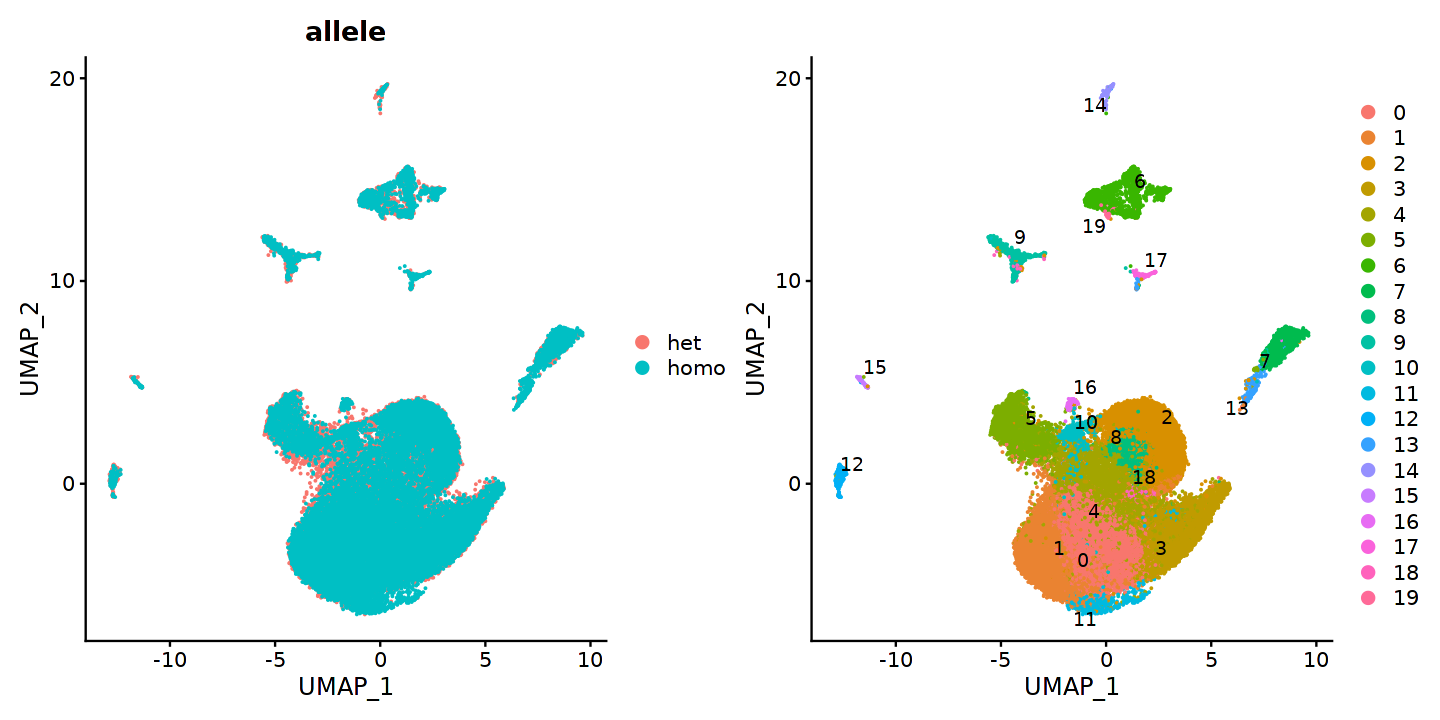

In [16]:
tumor.combined.annotation = tumor.combined$orig.ident
tumor.combined.annotation[grepl("het", tumor.combined$orig.ident)] = 'het'
tumor.combined.annotation[grepl("homo", tumor.combined$orig.ident)] = 'homo'

tumor.combined$allele = tumor.combined.annotation

options(repr.plot.height=6, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(tumor.combined, reduction = "umap", group.by = 'allele')
p2 <- DimPlot(tumor.combined, reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [19]:
old.meta.data = read.csv(
    glue::glue(
         '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat/',
        'neuroblast_5_samples_cc_regressed_meta_data.csv'
    ),
    row.names = 1
)

old.annot = old.meta.data$new_clusters
names(old.annot) = rownames(old.meta.data)
tumor.combined$old_clusters = old.annot[colnames(tumor.combined)]

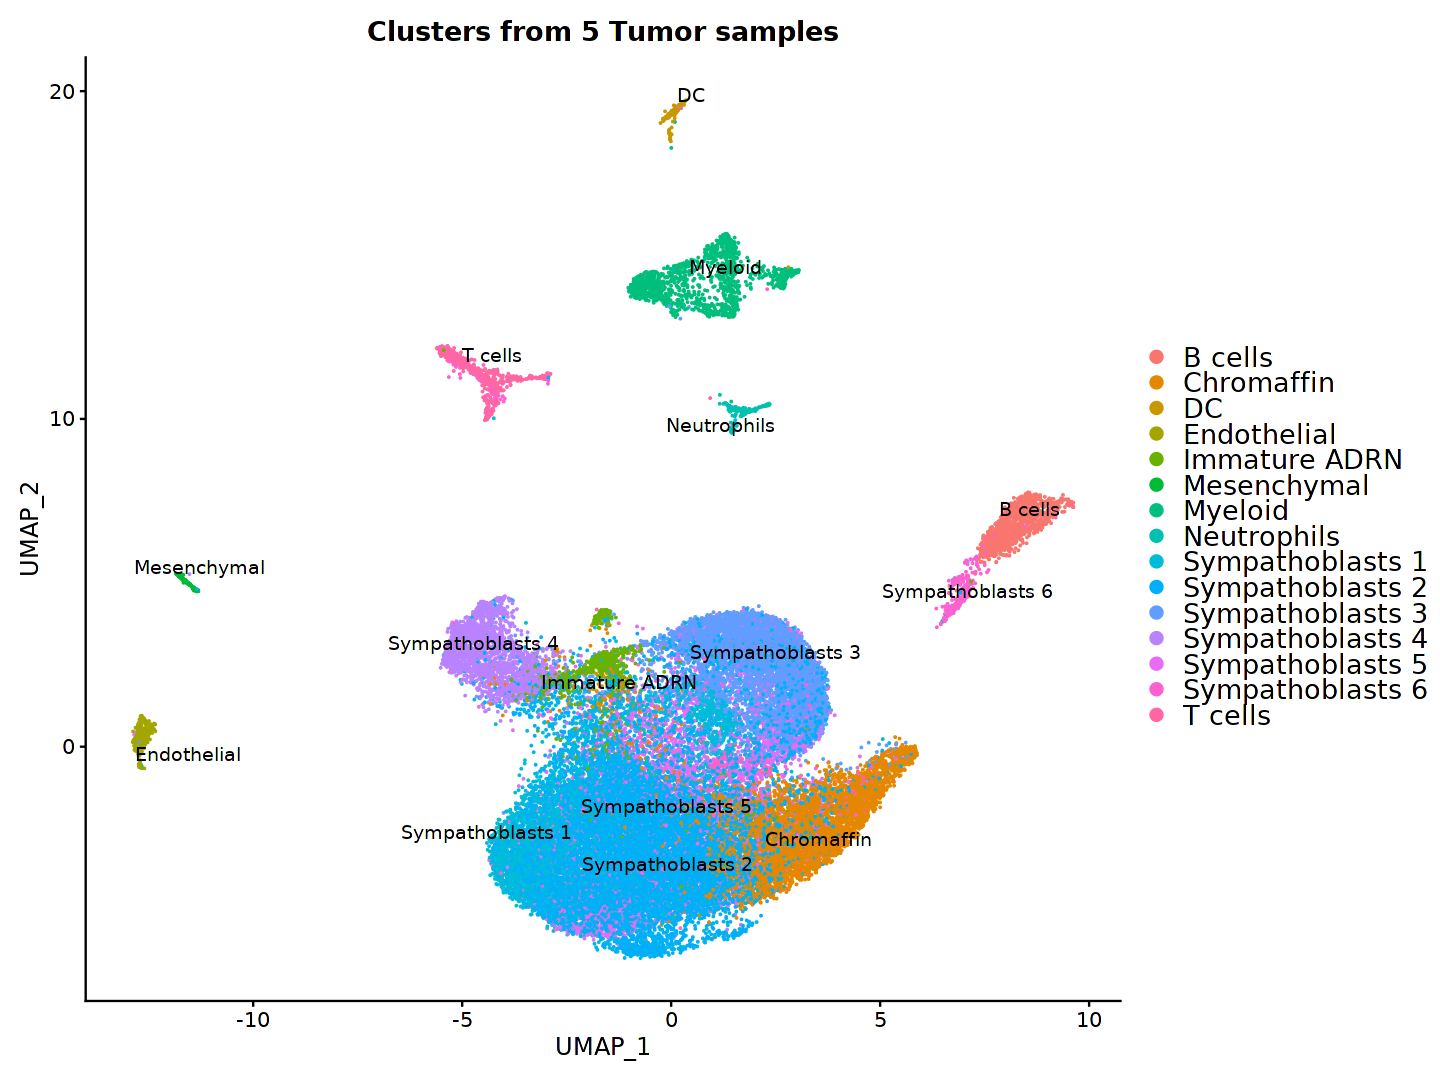

In [20]:
library(ggplot2)
options(repr.plot.height=9, repr.plot.width=12, res=150 ) 
DimPlot(tumor.combined, reduction = "umap",
        group.by = 'old_clusters',
        #cols = scales::hue_pal()(length(s5.order %>% unique )),
        label = TRUE, 
        repel = TRUE,
        label.size = 4,
       ) + 
    ggtitle('Clusters from 5 Tumor samples') +
    theme(
        legend.title = element_text(size=16), #change legend title font size
        legend.text = element_text(size=16)) #change legend text font size

In [27]:
source('../scripts/SeuratRun.r')

In [29]:
tumor.combined.objs = IntegrateSeuratObjCCFast(
    seurat.obj.list,
    nfeatures = 4000
)

[1] "getting features ..."
[1] "find anchors (fast) ..."


Computing 2000 integration features

Scaling features for provided objects

Computing within dataset neighborhoods

Finding anchors between all query and reference datasets

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2352 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 3039 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2098 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2523 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 3000 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 3194 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors



[1] "integrate ..."


Building integrated reference

Merging dataset 3 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data


Integrating dataset 2 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data


Integrating dataset 4 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data


Integrating dataset 5 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data



[1] "cell-cycle removal ..."


Warning message:
“The following features are not present in the object: PCNA, UBR7, MSH2, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: LBR, CTCF, GTSE1, not searching for symbol synonyms”
Regressing out S.Score, G2M.Score

Centering and scaling data matrix



In [ ]:
tumor.combined.objs$wocc

In [38]:
post_process = function(obj){
    obj = RunPCA(obj)
    obj = RunUMAP(obj, reduction="pca",dims=1:50)
    obj = FindNeighbors(obj, reduction="pca", dims=1:50)
    obj = FindClusters(obj, resolution = 0.5)
    obj
}

In [39]:
add_allele_annotation = function(obj){
    tumor.combined.annotation = obj$orig.ident
    tumor.combined.annotation[grepl("het", obj$orig.ident)] = 'het'
    tumor.combined.annotation[grepl("homo", obj$orig.ident)] = 'homo'
    obj$allele = tumor.combined.annotation
    obj
}

In [46]:
tumor.combined.f.wocc = tumor.combined.objs$wocc
tumor.combined.f.wocc = ScaleData( tumor.combined.f.wocc, verbose = F )
tumor.combined.f.wocc = post_process(tumor.combined.f.wocc)

PC_ 1 
Positive:  STMN1, TUBB5, TUBA1A, BASP1, DLK1, MYCN, DUT, STMN2, NPM1, RAN 
	   HMGN1, TUBB3, H2AFZ, PEG10, SET, NNAT, MEG3, ANP32B, HSPD1, CCND1 
	   CHGB, NEFL, RANBP1, DCTPP1, BEX2, NCL, TUBB2B, HMGB2, HMGB3, MAP1B 
Negative:  SRGN, CYBA, TYROBP, FCER1G, B2M, ARPC1B, HSPA1B, LGALS3, H2-D1, CTSS 
	   H2-K1, HSPA1A, IFITM3, TMSB4X, LAPTM5, CD52, LYZ2, PTPRC, KLF2, MS4A6C 
	   PLAC8, CD74, CORO1A, FXYD5, CYBB, S100A10, GNGT2, H2-AB1, RAC2, S100A6 
PC_ 2 
Positive:  FCER1G, LYZ2, TYROBP, CD300C2, MS4A6C, IL1B, CLEC4A3, LST1, ALOX5AP, CYBB 
	   PLA2G7, CTSS, LGALS3, SPI1, CD300A, CD68, WFDC17, MPEG1, NCF4, HSP90AA1 
	   CSF1R, CD14, MSRB1, HCK, FYB, CLEC4E, CORO1A, PTPRC, HP, PLAC8 
Negative:  SPARC, IGFBP7, COL4A1, COL4A2, SERPINH1, GNG11, TM4SF1, SPARCL1, CAVIN3, PLVAP 
	   RHOC, ESAM, EMCN, FABP4, CDH5, COL18A1, IGFBP3, PRSS23, CD34, RAMP2 
	   PPIC, CYR61, IGFBP4, TCIM, FLT1, MCAM, BGN, CD93, COL15A1, EDNRB 
PC_ 3 
Positive:  IFITM3, TOP2A, RRM2, CDK1, BIRC5, HIST1H1B, PCLAF, M

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 40044
Number of edges: 1378049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8924
Number of communities: 21
Elapsed time: 9 seconds


In [47]:
tumor.combined.f.wocc

An object of class Seurat 
20780 features across 40044 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [48]:
tumor.combined.f.wocc = add_allele_annotation(tumor.combined.f.wocc)

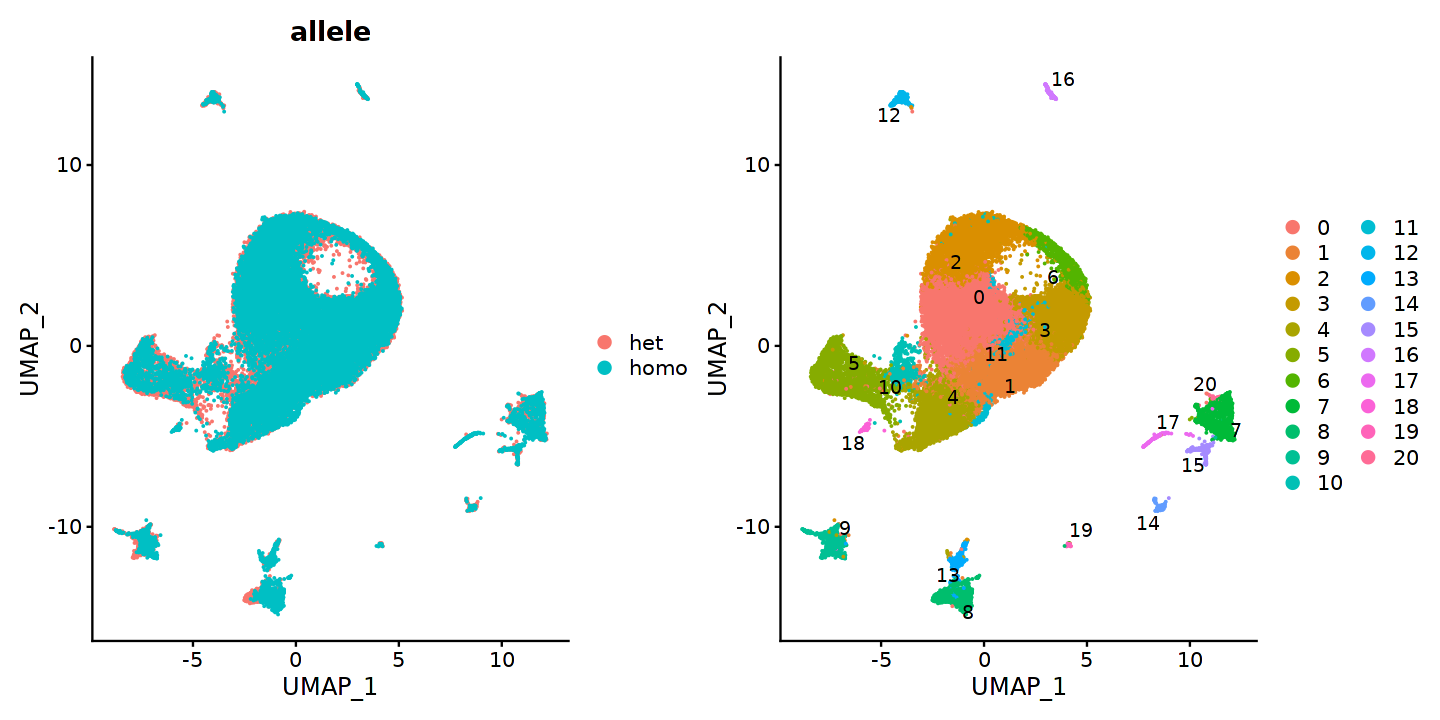

In [49]:
options(repr.plot.height=6, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(tumor.combined.f.wocc, reduction = "umap", group.by = 'allele')
p2 <- DimPlot(tumor.combined.f.wocc, reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [41]:
tumor.combined.f.cc = tumor.combined.objs$cc
tumor.combined.f.cc = post_process(tumor.combined.f.cc)
tumor.combined.f.cc = add_allele_annotation(tumor.combined.f.cc)

PC_ 1 
Positive:  STMN1, DLK1, STMN2, MYCN, TUBA1A, BASP1, NPM1, MEG3, TUBB5, TUBB3 
	   PEG10, NNAT, CHGB, HMGN1, PCSK1N, SET, RAN, HSPD1, DUT, TUBB2B 
	   MAP1B, BEX2, H2AFZ, NDN, ANP32B, NEFL, DCTPP1, NCL, CCND1, MLLT11 
Negative:  SRGN, CYBA, TYROBP, FCER1G, B2M, LGALS3, ARPC1B, H2-D1, HSPA1B, CTSS 
	   H2-K1, LYZ2, IFITM3, LAPTM5, CD52, HSPA1A, TMSB4X, PTPRC, MS4A6C, KLF2 
	   PLAC8, CYBB, FXYD5, CORO1A, CD74, GNGT2, S100A10, RAC2, ALOX5AP, S100A11 
PC_ 2 
Positive:  FCER1G, TYROBP, LYZ2, HSP90AA1, MS4A6C, CTSS, CD300C2, IL1B, CYBB, ALOX5AP 
	   CLEC4A3, LST1, PLA2G7, SPI1, LGALS3, CD300A, CD68, MPEG1, WFDC17, NCF4 
	   CSF1R, CORO1A, CD14, FYB, HCK, MSRB1, PTPRC, CEBPB, LAPTM5, CLEC4E 
Negative:  SPARC, IGFBP7, COL4A1, COL4A2, SERPINH1, GNG11, TM4SF1, SPARCL1, CAVIN3, PLVAP 
	   FABP4, RHOC, ESAM, EMCN, CDH5, COL18A1, IGFBP3, PRSS23, CD34, RAMP2 
	   PPIC, CYR61, CD93, FLT1, TCIM, IGFBP4, BGN, COL15A1, MCAM, EDNRB 
PC_ 3 
Positive:  IFITM3, LYZ2, FCER1G, CLEC4A3, CD300C2, PLA2G7,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 40044
Number of edges: 1252203

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8796
Number of communities: 20
Elapsed time: 9 seconds


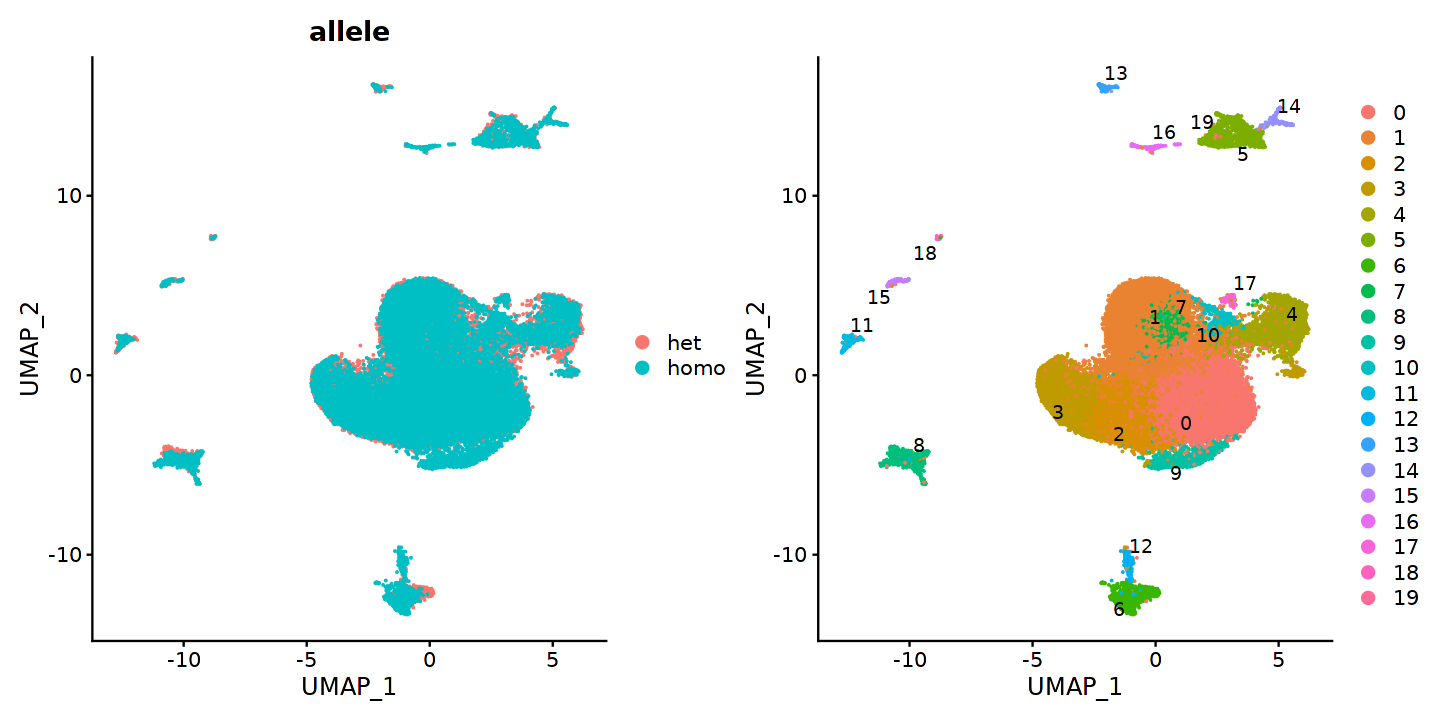

In [42]:
options(repr.plot.height=6, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(tumor.combined.f.cc, reduction = "umap", group.by = 'allele')
p2 <- DimPlot(tumor.combined.f.cc, reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

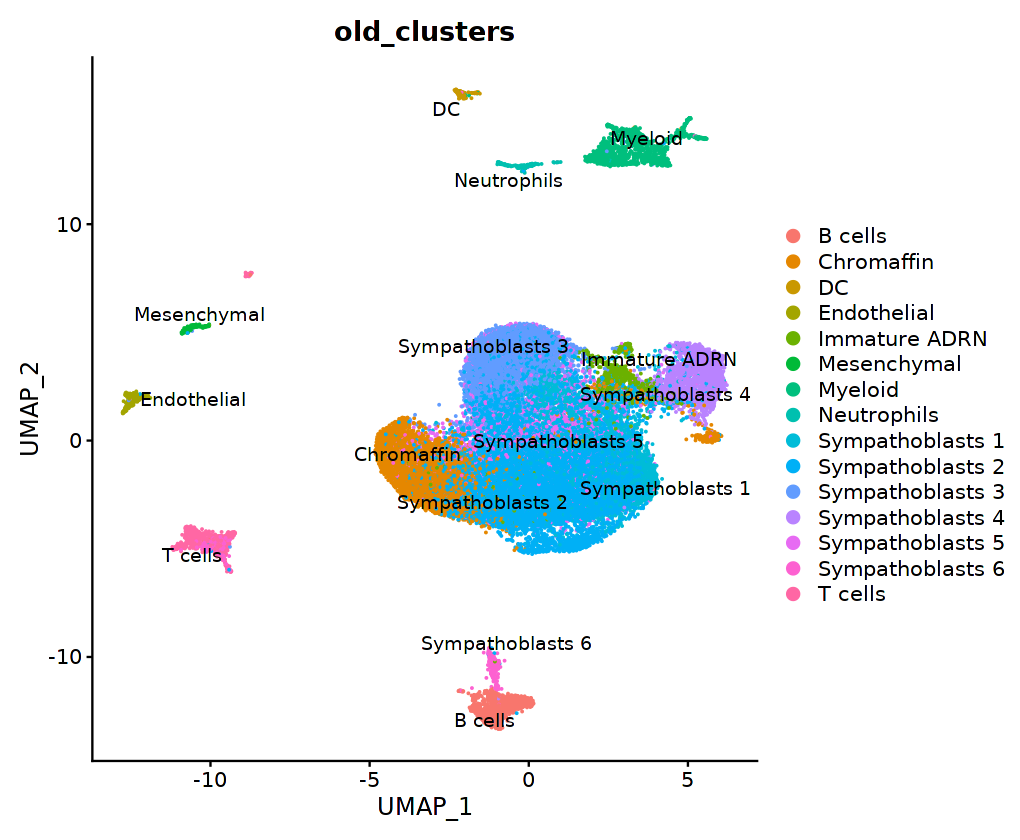

In [44]:
tumor.combined.f.cc$old_clusters = old.annot[colnames(tumor.combined.f.cc)]
options(repr.plot.height=7, repr.plot.width=8.5, res=150 ) 
DimPlot(tumor.combined.f.cc, reduction = "umap", 
        group.by = 'old_clusters',
        label = TRUE, repel = TRUE)

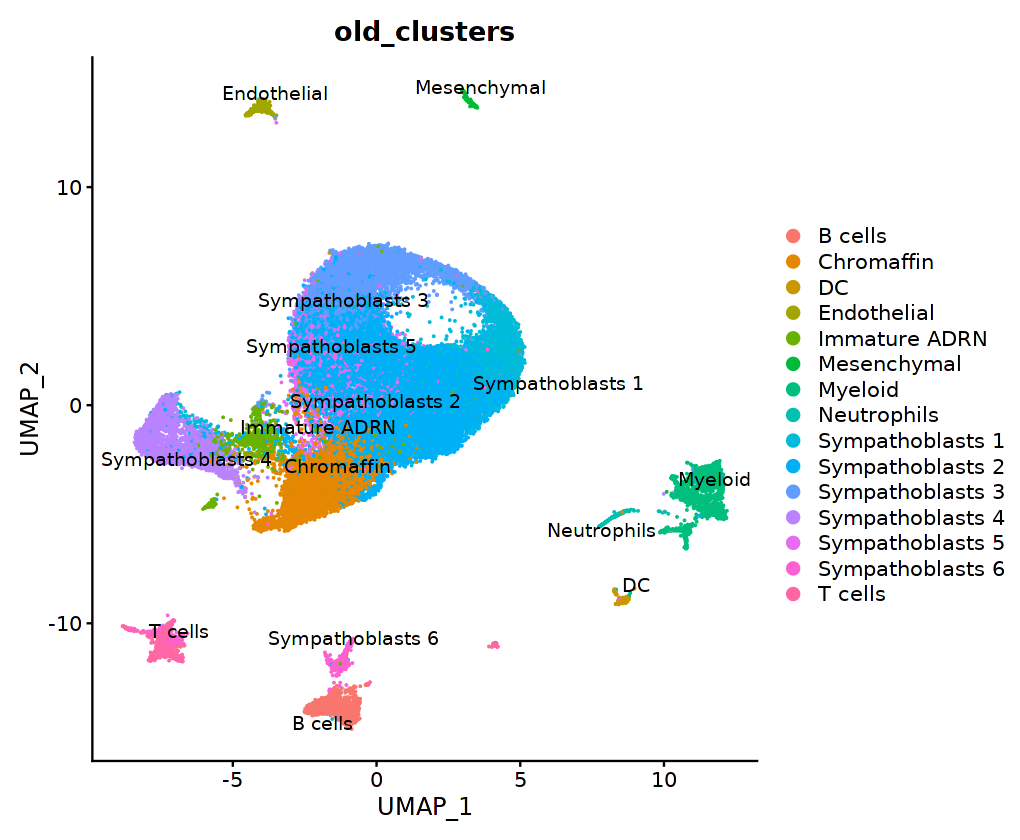

In [50]:
tumor.combined.f.wocc$old_clusters = old.annot[colnames(tumor.combined.f.wocc)]
options(repr.plot.height=7, repr.plot.width=8.5, res=150 ) 
DimPlot(tumor.combined.f.wocc, reduction = "umap", 
        group.by = 'old_clusters',
        label = TRUE, repel = TRUE)

In [58]:
tumor.combined.f = tumor.combined.objs$wocc
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

s.genes.selected = intersect(seurat.obj.list[[1]] %>% rownames,  s.genes )
g2m.genes.selected = intersect(seurat.obj.list[[1]] %>% rownames,  g2m.genes )
tumor.combined.f <-   CellCycleScoring(
        tumor.combined.f, 
        s.features = s.genes.selected, 
        g2m.features = g2m.genes.selected, 
        set.ident = TRUE
    )

Warning message:
“The following features are not present in the object: PCNA, UBR7, MSH2, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: LBR, CTCF, GTSE1, not searching for symbol synonyms”


In [59]:
tumor.combined.f$CC.Difference <- tumor.combined.f$S.Score - tumor.combined.f$G2M.Score
tumor.combined.f <- ScaleData(
    tumor.combined.f, vars.to.regress = "CC.Difference", 
    features = rownames(tumor.combined.f)
)

Regressing out CC.Difference

Centering and scaling data matrix



In [60]:
tumor.combined.f = post_process(tumor.combined.f)
tumor.combined.f = add_allele_annotation(tumor.combined.f)

PC_ 1 
Positive:  STMN1, TUBB5, TUBA1A, BASP1, DLK1, MYCN, DUT, STMN2, NPM1, RAN 
	   HMGN1, TUBB3, H2AFZ, PEG10, SET, MEG3, NNAT, ANP32B, HSPD1, CCND1 
	   NEFL, CHGB, RANBP1, HMGB2, DCTPP1, BEX2, NCL, TUBB2B, HMGB3, MAP1B 
Negative:  SRGN, CYBA, TYROBP, FCER1G, B2M, HSPA1B, ARPC1B, LGALS3, H2-D1, H2-K1 
	   CTSS, HSPA1A, IFITM3, TMSB4X, LAPTM5, CD52, LYZ2, PTPRC, KLF2, MS4A6C 
	   PLAC8, CD74, CORO1A, FXYD5, CYBB, S100A10, GNGT2, H2-AB1, RAC2, S100A6 
PC_ 2 
Positive:  FCER1G, LYZ2, TYROBP, CD300C2, MS4A6C, IL1B, CLEC4A3, LST1, ALOX5AP, PLA2G7 
	   CYBB, LGALS3, CTSS, SPI1, CD300A, CD68, WFDC17, MPEG1, NCF4, CSF1R 
	   CD14, HSP90AA1, MSRB1, HCK, FYB, CLEC4E, HP, PLAC8, HMOX1, CLEC4N 
Negative:  SPARC, IGFBP7, COL4A1, COL4A2, SERPINH1, GNG11, TM4SF1, SPARCL1, CAVIN3, PLVAP 
	   RHOC, ESAM, EMCN, CDH5, FABP4, COL18A1, IGFBP3, PRSS23, CD34, RAMP2 
	   PPIC, CYR61, IGFBP4, TCIM, FLT1, MCAM, BGN, COL15A1, CD93, EDNRB 
PC_ 3 
Positive:  RRM2, IFITM3, TOP2A, HIST1H1B, CDK1, SPARC, PCLAF, F

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 40044
Number of edges: 1274011

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8863
Number of communities: 20
Elapsed time: 9 seconds


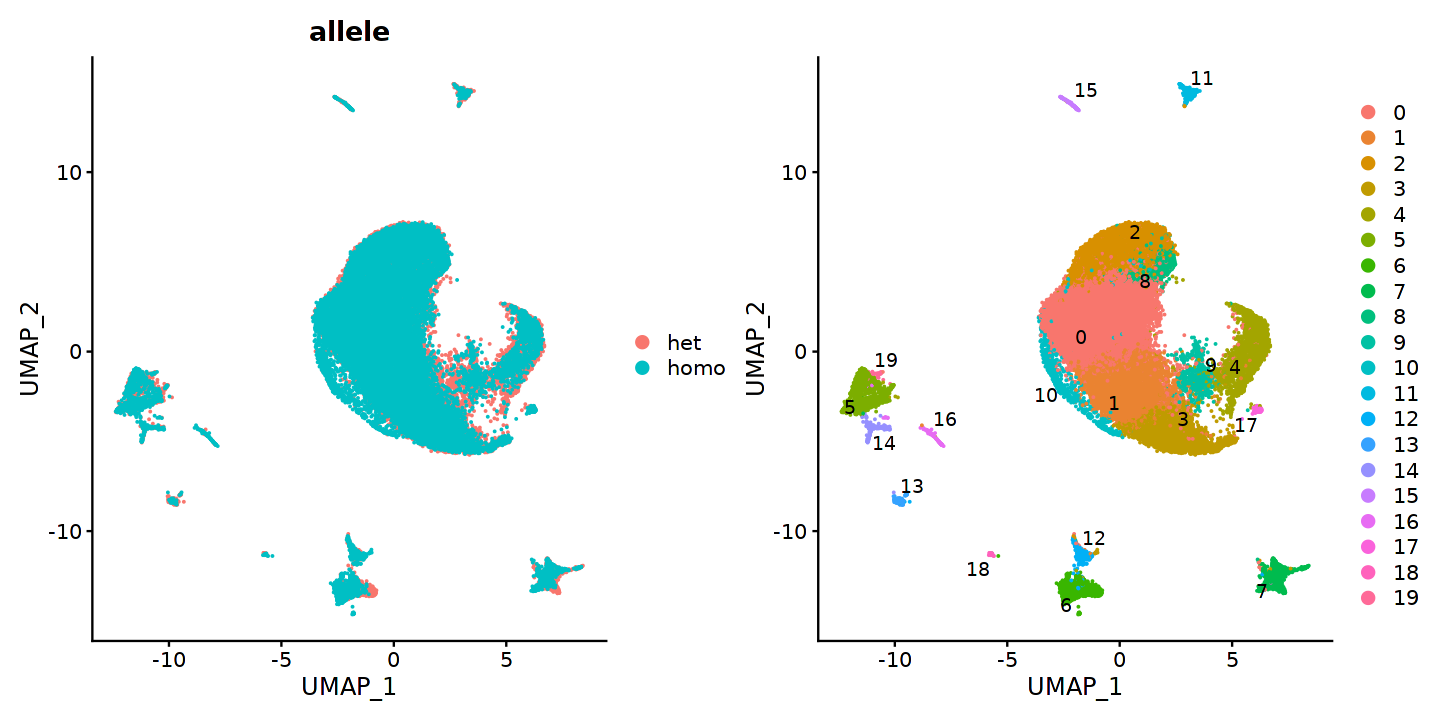

In [61]:
options(repr.plot.height=6, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(tumor.combined.f, reduction = "umap", group.by = 'allele')
p2 <- DimPlot(tumor.combined.f, reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

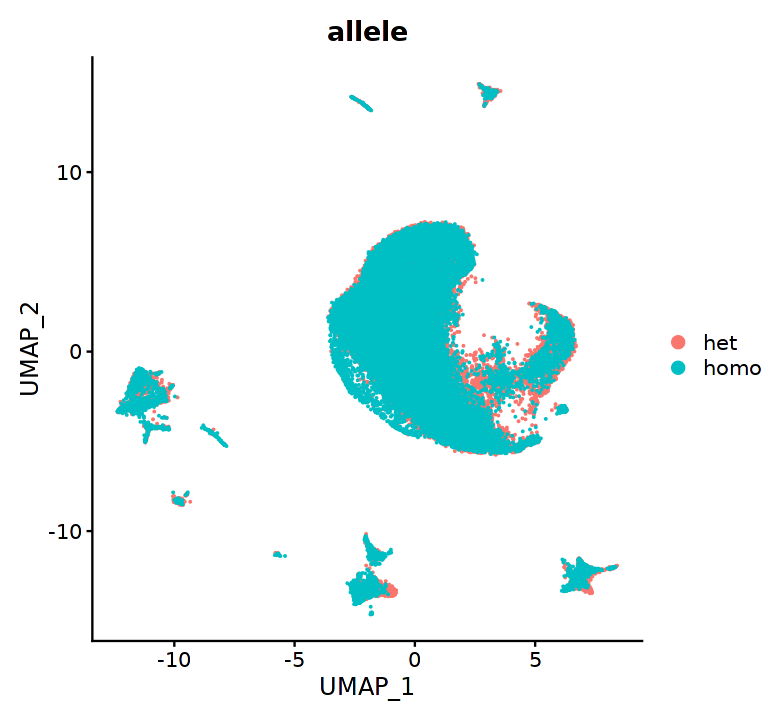

In [371]:
options(repr.plot.height=6, repr.plot.width=6.5, res=150 ) 
p1 = DimPlot(tumor.combined.f, reduction = "umap", group.by = 'allele')
ggsave(
    filename=glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_difference/',
        'neuroblast_5_samples_cc_difference_allele.pdf'
    ),
    plot=p1,
    height = 6,
    width = 6.5
)
p1

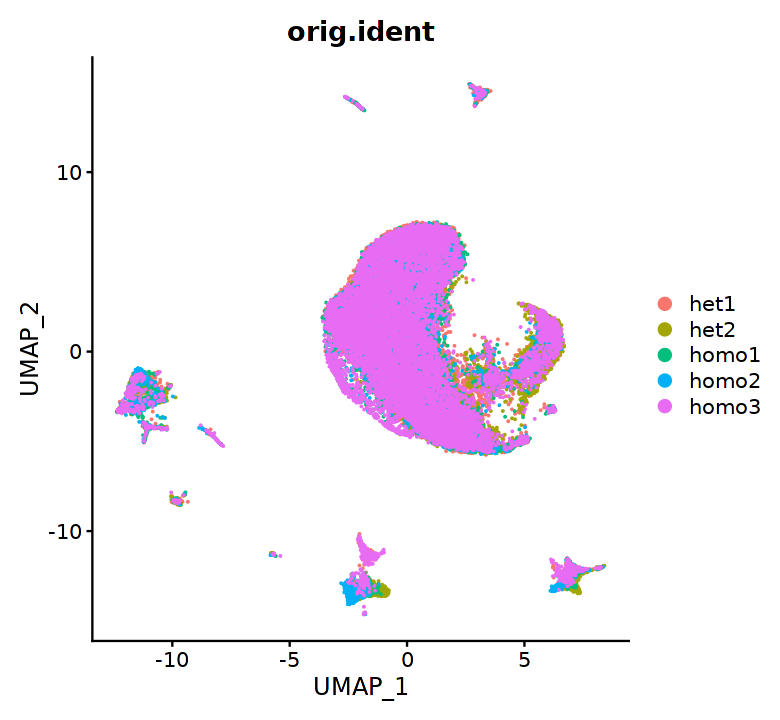

In [372]:
options(repr.plot.height=6, repr.plot.width=6.5, res=150 ) 
p1 = DimPlot(tumor.combined.f, reduction = "umap", group.by = 'orig.ident')
ggsave(
    filename=glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_difference/',
        'neuroblast_5_samples_cc_difference_orig_ident.pdf'
    ),
    plot=p1,
    height = 6,
    width = 6.5
)
p1

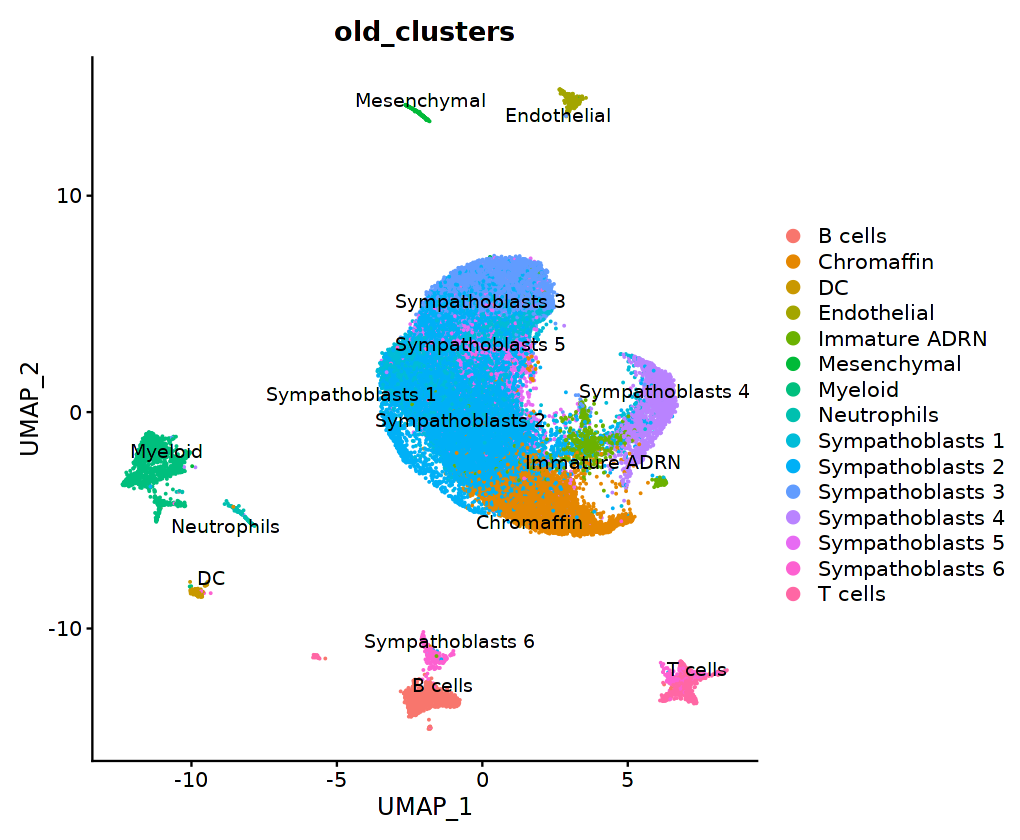

In [62]:
tumor.combined.f$old_clusters = old.annot[colnames(tumor.combined.f)]
options(repr.plot.height=7, repr.plot.width=8.5, res=150 ) 
DimPlot(tumor.combined.f, reduction = "umap", 
        group.by = 'old_clusters',
        label = TRUE, repel = TRUE)

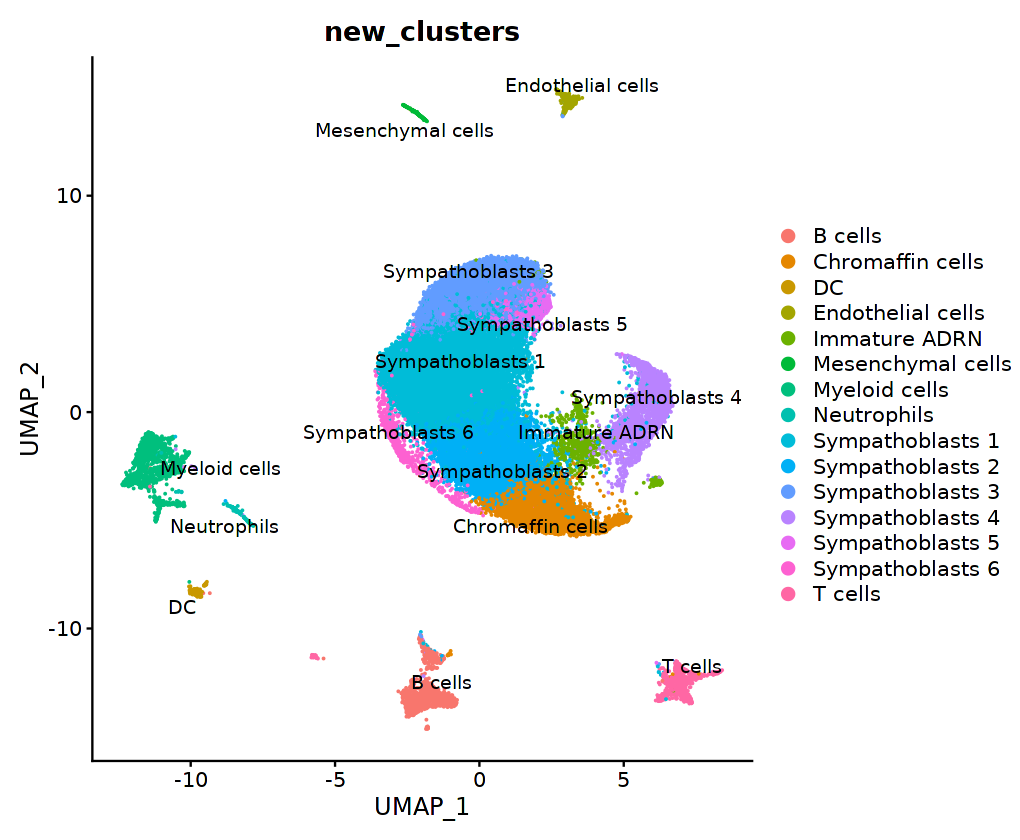

In [392]:
options(repr.plot.height=7, repr.plot.width=8.5, res=150 ) 
p1 = DimPlot(tumor.combined.f, reduction = "umap", 
        group.by = 'new_clusters',
        label = TRUE, repel = TRUE)
ggsave(
    filename=glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_difference/',
        'neuroblast_5_samples_cc_difference_new_cluster.pdf'
    ),
    plot=p1,
    height = 7,
    width = 8.5
)
p1

In [394]:
cluster.order %>% sort

[1] "B cells"           "Chromaffin cells"  "DC"               
 [4] "Endothelial cells" "Immature ADRN"     "Mesenchymal cells"
 [7] "Myeloid cells"     "Neutrophils"       "Sympathoblasts 1" 
[10] "Sympathoblasts 2"  "Sympathoblasts 3"  "Sympathoblasts 4" 
[13] "Sympathoblasts 5"  "Sympathoblasts 6"  "T cells"

In [395]:
color.order = scales::hue_pal()(length(cluster.order))
names(color.order) = cluster.order %>% sort
color.order %>% stack %>% 
    purrr::set_names(c('code','ind')) %>%
    write.csv(
        glue::glue(
             '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/',
            'neuroblast_5_samples_cc_difference_color_code.csv'
        ),
    row.names =F
)

In [178]:
old_cluster_order = levels(factor(tumor.combined$old_clusters))

In [179]:
old_cluster_order

[1] "B cells"          "Chromaffin"       "DC"               "Endothelial"     
 [5] "Immature ADRN"    "Mesenchymal "     "Myeloid"          "Neutrophils"     
 [9] "Sympathoblasts 1" "Sympathoblasts 2" "Sympathoblasts 3" "Sympathoblasts 4"
[13] "Sympathoblasts 5" "Sympathoblasts 6" "T cells"

In [211]:
s5.annotations = openxlsx::read.xlsx(
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/',
        'spread_sheet/',
        '2022-02-01 DE Pagoda.xlsx'
    ),
    sheet = 'Annotations'
)

In [288]:
cc_difference_genes = openxlsx::read.xlsx(
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/',
        'spread_sheet/',
        'mouse_nb_5_samples_annotations_dotplot.xlsx'
    )
)

In [308]:
featured_gene_order = cc_difference_genes$Gene

In [310]:
s5.annotations$Annotation %>% unique

[1] "Sympathoblasts 1"  "Sympathoblasts 2"  "Sympathoblasts 3" 
 [4] "Chromaffin cells"  "Sympathoblasts 4"  "Myeloid cells"    
 [7] "B cells"           "T cells"           "Sympathoblasts 5" 
[10] "Immature ADRN"     "Sympathoblasts 6"  "Endothelial cells"
[13] "DC"                "Mesenchymal cells" "Neutrophils"

In [314]:
cluster.order = cc_difference_genes$Annotation[
    cc_difference_genes$Annotation %in% s5.annotations$Annotation] %>% unique

In [329]:
s5.annotations$Annotation

[1] "Sympathoblasts 1"  "Sympathoblasts 2"  "Sympathoblasts 3" 
 [4] "Chromaffin cells"  "Sympathoblasts 4"  "Myeloid cells"    
 [7] "B cells"           "T cells"           "Sympathoblasts 5" 
[10] "Immature ADRN"     "Sympathoblasts 6"  "Endothelial cells"
[13] "B cells"           "DC"                "Myeloid cells"    
[16] "Mesenchymal cells" "Neutrophils"       "Immature ADRN"    
[19] "T cells"           "Myeloid cells"

In [330]:
tmp = s5.annotations$Annotation[ tumor.combined.f$seurat_clusters ]

In [331]:
tmp %>% head

[1] "Sympathoblasts 3"  "Sympathoblasts 2"  "Endothelial cells"
[4] "Sympathoblasts 3"  "Sympathoblasts 1"  "Sympathoblasts 1"

In [332]:
names(tmp) = names(tumor.combined.f$seurat_clusters)

In [333]:
tumor.combined.f$new_clusters = tmp

In [334]:
saveRDS(
    tumor.combined.f,
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/',
        'neuroblast_5_samples_cc_difference.rds'
    )
)

In [335]:
cc_difference_genes$Annotation %>% unique

[1] "Tumor cell"        "Tumor cells"       "Sympathoblasts 1" 
 [4] "Sympathoblasts 2"  "Sympathoblasts 3"  "Sympathoblasts 4" 
 [7] "Sympathoblasts 5"  "Sympathoblasts 6"  "Chromaffin cells" 
[10] "Immature ADRN"     "Mesenchymal cells" "Endothelial cells"
[13] "B cells"           "T cells"           "Myeloid cells"    
[16] "Neutrophils"       "DC"

In [336]:
cc_difference_genes$Gene

[1] "MYCN"     "Phox2b"   "Isl1"     "Stmn1"    "Cdc20"    "Pttg1"   
 [7] "Ccnb2"    "Cenpa"    "Ube2c"    "Nefl"     "Nefm"     "HIST1H1B"
[13] "Top2a"    "Fbxo5"    "Cdk1"     "Prc1"     "Atad2"    "Mki67"   
[19] "Tubb5"    "Ran"      "Npm1"     "Birc5"    "Aurkb"    "Cenpf"   
[25] "Ccnb1"    "Hmmr"     "Cenpe"    "DLX5"     "DLX6"     "Th"      
[31] "Dbh"      "Npy"      "Caly"     "Chga"     "Pcsk1n"   "Podxl2"  
[37] "Sox11"    "Tcf4"     "Eml5"     "Ttc3"     "Meg3"     "Peg10"   
[43] "Atrx"     "Xist"     "Gm26917"  "Gm42418"  "Kcnq1ot1" "Ncam1"   
[49] "Elavl3"   "Mgp"      "Pdgfrb"   "Col1a1"   "Col1a2"   "Cdh5"    
[55] "Egfl7"    "Emcn"     "Cd34"     "Kdr"      "Igkc"     "Ighd"    
[61] "Bank1"    "Ms4a1"    "Cd79a"    "Cd79b"    "Mzb1"     "Cd3d"    
[67] "Cd3g"     "Trbc"     "Trac"     "Clec4a3"  "Ms4a6c"   "Fcer1g"  
[73] "Lyz2"     "Il1b"     "Msrb1"    "S100a8"   "S100a9"   "Clec10a" 
[79] "Siglech"

In [347]:
tumor.combined.f@active.ident = factor(
    tumor.combined.f$new_clusters,
    levels = cluster.order %>% rev
)

In [348]:
cluster.order

[1] "Sympathoblasts 1"  "Sympathoblasts 2"  "Sympathoblasts 3" 
 [4] "Sympathoblasts 4"  "Sympathoblasts 5"  "Sympathoblasts 6" 
 [7] "Chromaffin cells"  "Immature ADRN"     "Mesenchymal cells"
[10] "Endothelial cells" "B cells"           "T cells"          
[13] "Myeloid cells"     "Neutrophils"       "DC"

In [349]:
levels(tumor.combined.f@active.ident)

[1] "DC"                "Neutrophils"       "Myeloid cells"    
 [4] "T cells"           "B cells"           "Endothelial cells"
 [7] "Mesenchymal cells" "Immature ADRN"     "Chromaffin cells" 
[10] "Sympathoblasts 6"  "Sympathoblasts 5"  "Sympathoblasts 4" 
[13] "Sympathoblasts 3"  "Sympathoblasts 2"  "Sympathoblasts 1"

In [339]:
tumor.combined.f@active.ident %>% levels %>% length

[1] 15

In [340]:
tumor.combined.f@active.ident %>% head

het1_tumor_AAACCCAAGCTTTCCC-1 het1_tumor_AAACCCAAGGCGTTAG-1 
             Sympathoblasts 3              Sympathoblasts 2 
het1_tumor_AAACCCACAATCTCGA-1 het1_tumor_AAACCCACACCAAAGG-1 
            Endothelial cells              Sympathoblasts 3 
het1_tumor_AAACCCAGTCGAACAG-1 het1_tumor_AAACCCATCACATCAG-1 
             Sympathoblasts 1              Sympathoblasts 1 
15 Levels: DC Neutrophils Myeloid cells T cells B cells ... Sympathoblasts 1

In [341]:
tumor.combined.f$new_clusters %>% head

het1_tumor_AAACCCAAGCTTTCCC-1 het1_tumor_AAACCCAAGGCGTTAG-1 
           "Sympathoblasts 3"            "Sympathoblasts 2" 
het1_tumor_AAACCCACAATCTCGA-1 het1_tumor_AAACCCACACCAAAGG-1 
          "Endothelial cells"            "Sympathoblasts 3" 
het1_tumor_AAACCCAGTCGAACAG-1 het1_tumor_AAACCCATCACATCAG-1 
           "Sympathoblasts 1"            "Sympathoblasts 1"

In [343]:
tumor.combined.f$old_clusters %>% head

het1_tumor_AAACCCAAGCTTTCCC-1 het1_tumor_AAACCCAAGGCGTTAG-1 
           "Sympathoblasts 3"            "Sympathoblasts 2" 
het1_tumor_AAACCCACAATCTCGA-1 het1_tumor_AAACCCACACCAAAGG-1 
                "Endothelial"            "Sympathoblasts 3" 
het1_tumor_AAACCCAGTCGAACAG-1 het1_tumor_AAACCCATCACATCAG-1 
           "Sympathoblasts 5"            "Sympathoblasts 1"

In [342]:
cc_difference_genes$Annotation %>% unique %>% rev %>% length

[1] 17

In [297]:
levels(factor(tumor.combined.f$new_clusters, 
              levels = cc_difference_genes$Annotation %>% unique %>% rev)) %>% length

[1] 17

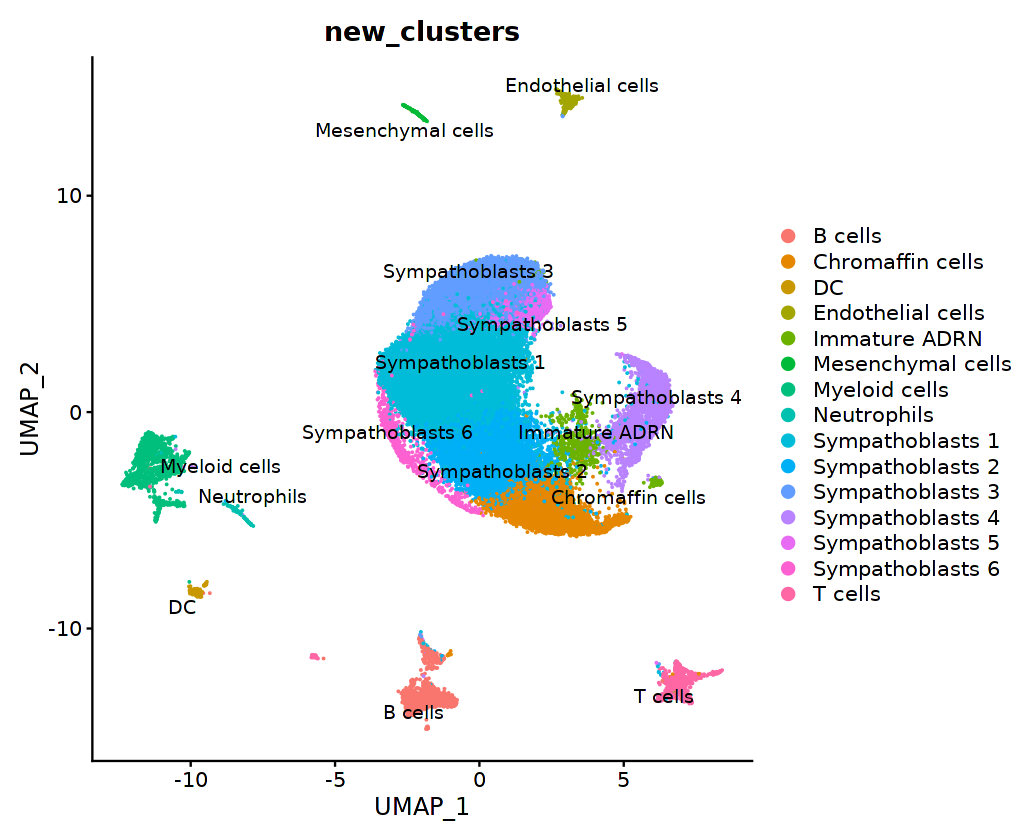

In [344]:
options(repr.plot.height=7, repr.plot.width=8.5, res=150 ) 
DimPlot(tumor.combined.f, reduction = "umap", 
        group.by = 'new_clusters',
        label = TRUE, repel = TRUE)

In [381]:
s5.annotations %>% select(gene, Annotation) %>% distinct %>% dim

[1] 15  2

In [380]:
gene.order = s5.annotations %>% select(gene, Annotation) %>% distinct %>% pull(gene)
annot.order = s5.annotations %>% select(gene, Annotation) %>% distinct %>% pull(Annotation)

In [382]:
options(repr.plot.height=4, repr.plot.width=4.5, res=150 ) 
plot_list = lapply(seq(1,15),
                   function(i){
                     FeaturePlot(tumor.combined.f, 
                        features = c(gene.order[[i]]),
                        min.cutoff = "q9") +
                       ggtitle(paste(gene.order[[i]],annot.order[[i]],sep='\n'))
                   }
                )

Warning message:
“Could not find LBR in the default search locations, found in RNA assay instead”


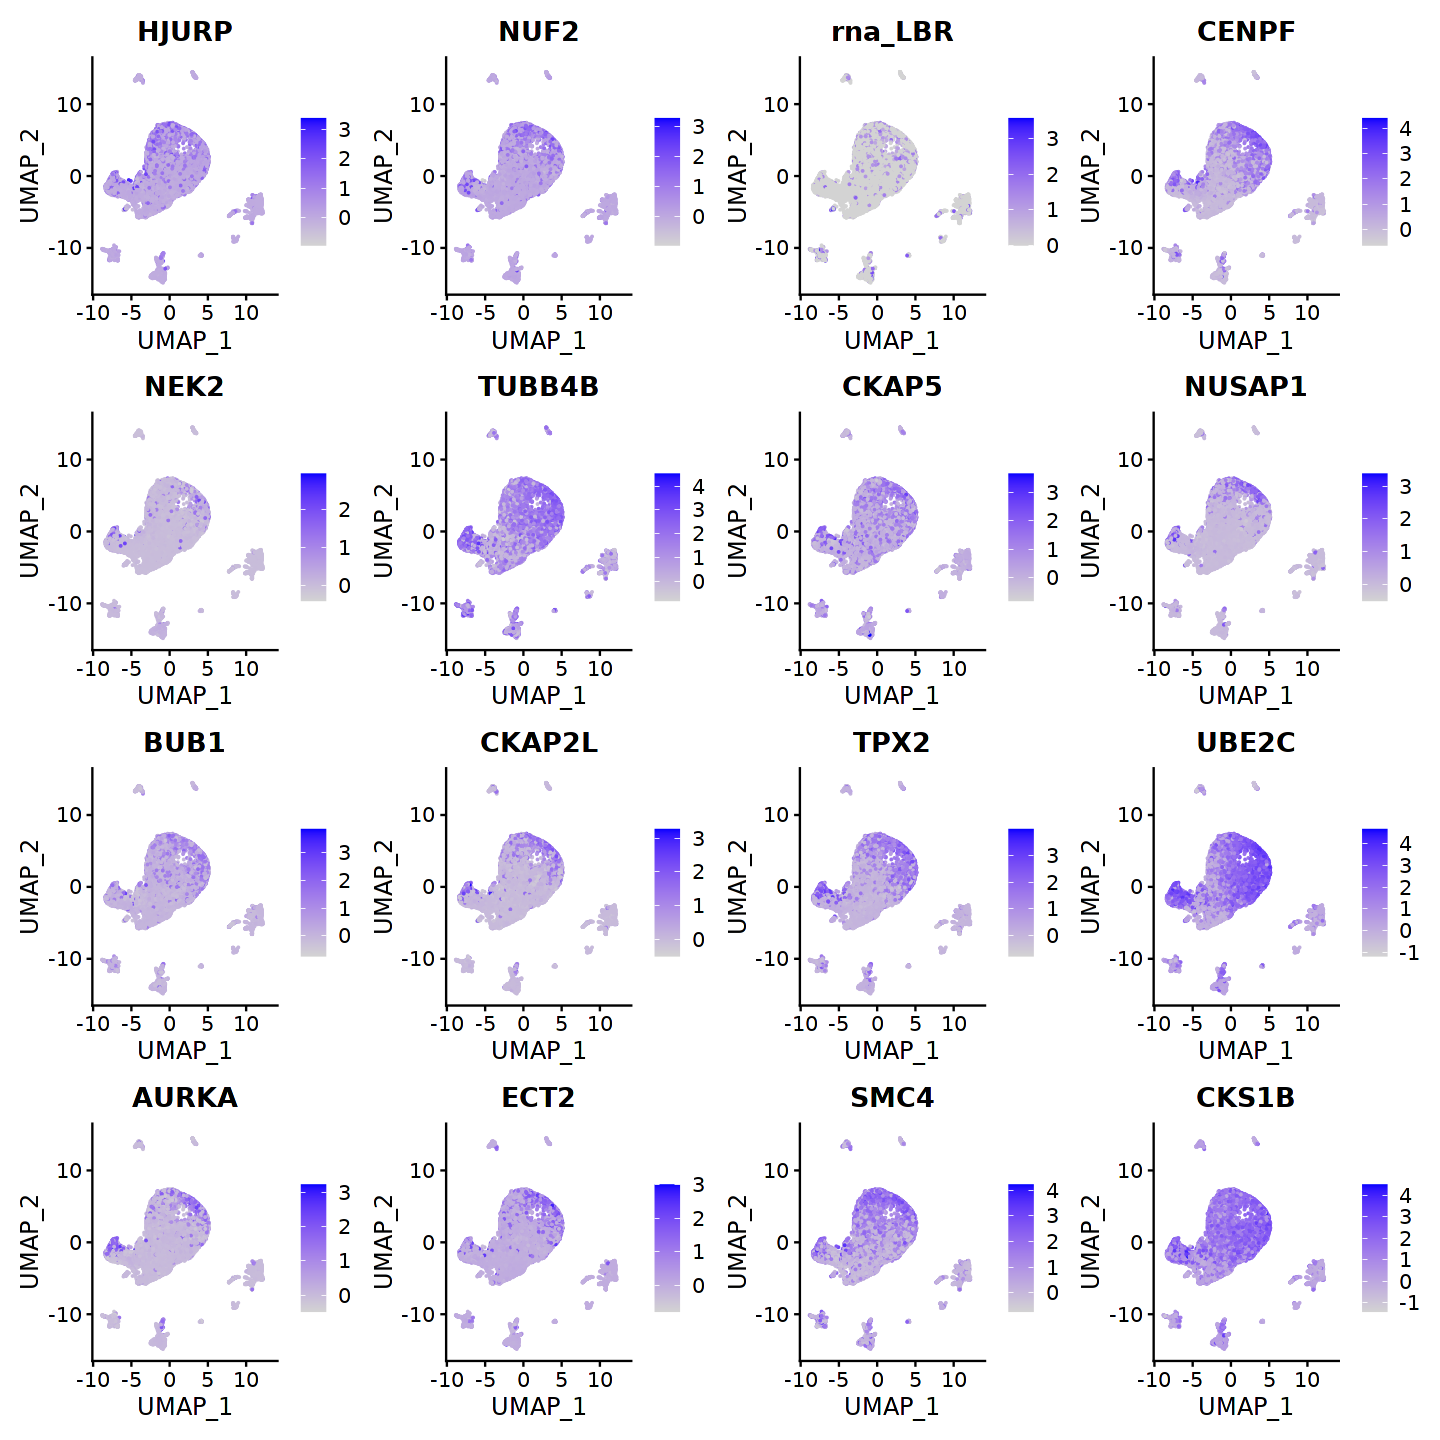

In [398]:
options(repr.plot.height=12, repr.plot.width=12, res=150 ) 
FeaturePlot(tumor.combined.f.wocc, features = g2m.genes.selected[1:16])

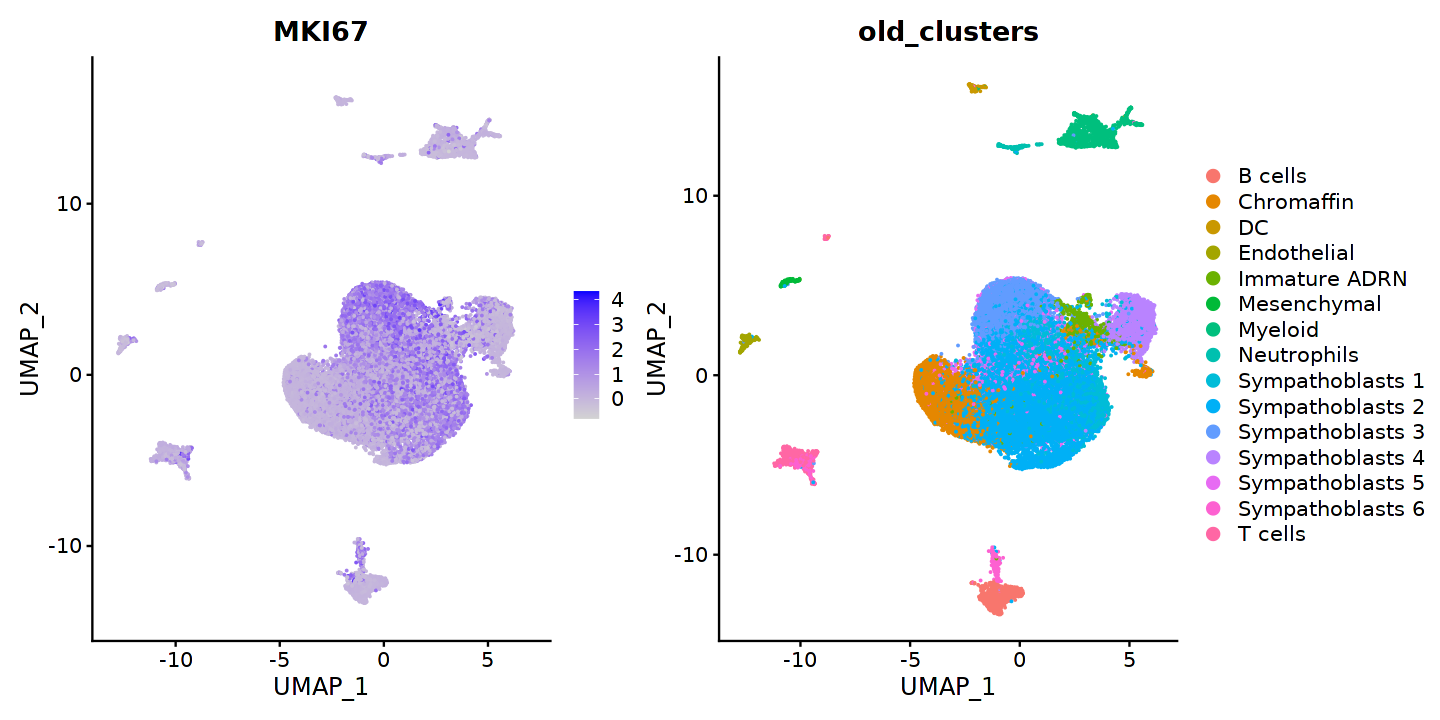

In [405]:
options(repr.plot.height=6, repr.plot.width=12, res=150 ) 
FeaturePlot(tumor.combined.f.cc, features = c('MKI67')) |
DimPlot(tumor.combined.f.cc, reduction = "umap", 
        group.by = 'old_clusters',)

In [408]:
'MKI67' %in% s.genes.selected

[1] FALSE

In [409]:
'MKI67' %in% g2m.genes.selected

[1] TRUE

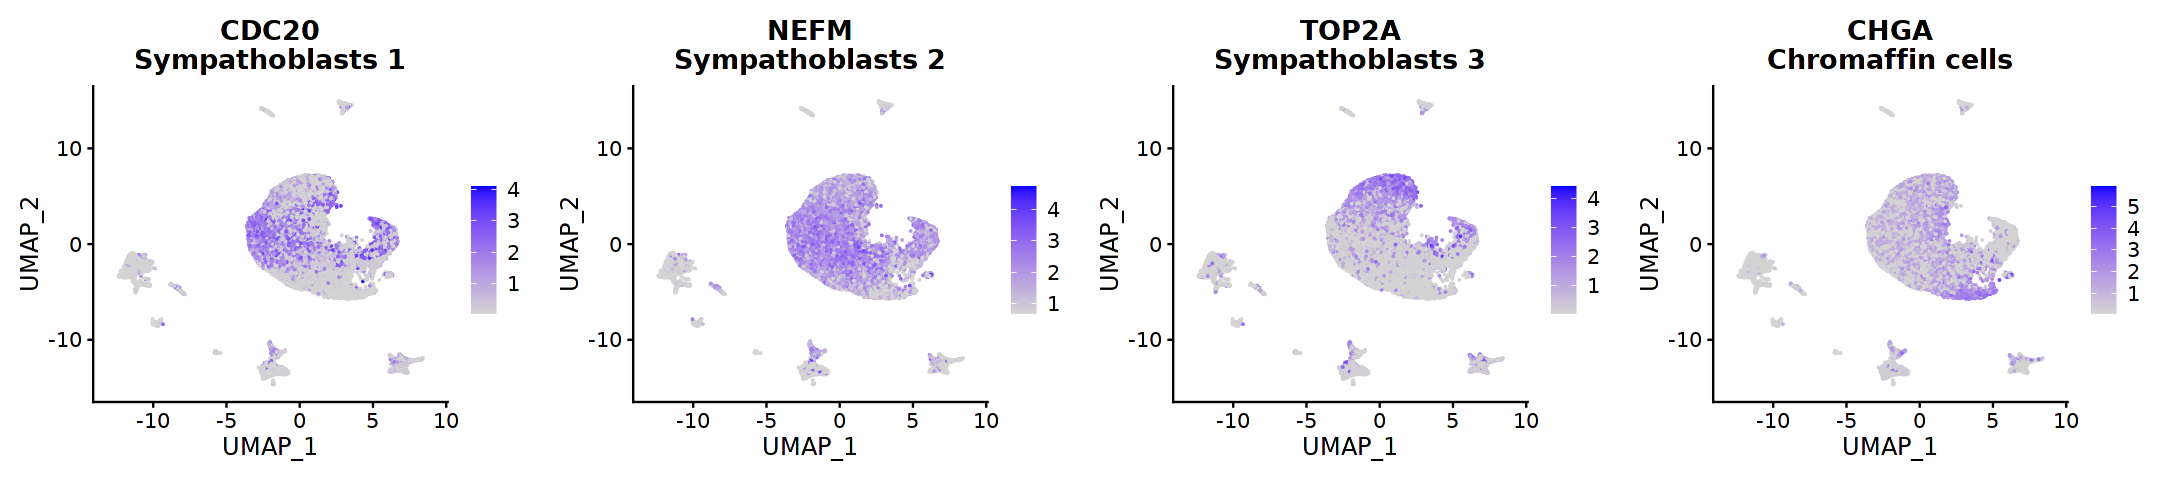

In [383]:
options(repr.plot.height=4, repr.plot.width=18, res=150 ) 
cowplot::plot_grid(plotlist = plot_list[1:4], ncol = 4)

In [384]:
options(repr.plot.height=16, repr.plot.width=20, res=150 ) 

gene_level_plot = cowplot::plot_grid(plotlist = plot_list, ncol = 4)

In [385]:
ggsave(filename=glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_difference/',
        'neuroblast_5_samples_cc_difference_feature_plot.pdf'
    ),
    plot=gene_level_plot,height=25,width=28)

In [378]:
options(repr.plot.height=12, repr.plot.width=12, res=150 ) 
feature.plot = FeaturePlot(tumor.combined.f, 
            features = s5.annotations %>% select(gene, Annotation) %>% distinct %>% pull(gene),
            min.cutoff = "q9")

In [379]:
ggsave(
    filename=glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_difference/',
        'neuroblast_5_samples_cc_difference_feature_plot.pdf'
    ),
    plot = feature.plot,
    height = 14,
    width = 14
)

In [354]:
rownames(tumor.combined.f) %>% length

[1] 2000

In [358]:
options(repr.plot.height=8, repr.plot.width=20, res=150) 
dotplot.fig = DotPlot(tumor.combined.f,
        assay = 'RNA',
        #group.by = 'new_clusters',
        features = toupper(cc_difference_genes$Gene)
       ) + 
RotatedAxis()

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: TRBC”


In [364]:
ggsave(
    filename=glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_difference/',
        'neuroblast_5_samples_cc_difference_dotplot.pdf'
    ),
    plot=dotplot.fig,
    height = 8,
    width = 20
)

In [363]:
'TRBC2' %in% rownames(tumor.combined.f@assays$RNA@counts) 

[1] TRUE

In [257]:
tumor.combined.f[c('NEFM','NEFL'),]

Warning message in cells.idents["NA"] <- names(x = which(x = is.na(x = Idents(object = object)[cells]))):
“number of items to replace is not a multiple of replacement length”


An object of class Seurat 
4 features across 34153 samples within 2 assays 
Active assay: integrated (2 features, 2 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [388]:
cluster.order %>% length

[1] 15

In [390]:
color.order = scales::hue_pal()(length(cluster.order))
names(color.order) = cluster.order
color.order %>% stack %>% 
    purrr::set_names(c('code','ind')) %>%
    write.csv(
        glue::glue(
             '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/',
            'neuroblast_5_samples_cc_difference_color_code.csv'
        ),
    row.names =F
)

In [144]:
source('../scripts/SeuratRun.r')

In [126]:
seurat.obj.list = Conos2Seurat(tumor.con, remove.cc.genes = TRUE, nfeatures=4000)

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”


In [145]:
tumor.combined.remove.cc = IntegrateSeuratObjFast(seurat.obj.list,nfeatures = 4000)

[1] "getting features ..."
[1] "find anchors (fast) ..."


Computing 2000 integration features

Scaling features for provided objects

Computing within dataset neighborhoods

Finding anchors between all query and reference datasets

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2264 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2910 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2035 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2521 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2909 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 3089 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors



[1] "integrate ..."


Building integrated reference

Merging dataset 3 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data


Integrating dataset 2 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data


Integrating dataset 4 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data


Integrating dataset 5 with reference dataset

Finding integration vectors

Finding integration vector weights

Integrating data

PC_ 1 
Positive:  STMN1, FABP5, TUBA1A, TUBB5, BASP1, DLK1, MYCN, MIF, STMN2, NME1 
	   DUT, NPM1, TUBB3, RAN, HMGN1, SET, PEG10, H2AFZ, MEG3, NNAT 
	   HSPD1, EIF5A, CHGB, ANP32B, CCND1, UBE2S, TOMM20, DCTPP1, NEFL, RANBP1 
Negative:  SRGN, CYBA, B2M, TYROBP, FCER1G, HSPA1B, H2-D1, LGALS3, H2-K1, ARPC1B 
	   LAPTM5, CTSS, HSPA1A, TMSB4X, CD52, IFITM3, LYZ2, PTPRC, KLF2, PLAC8 
	   MS4A6C, CD74, CYBB, CORO1A, FXYD5, RAC2, S100A

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 40044
Number of edges: 1327335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8824
Number of communities: 21
Elapsed time: 10 seconds


In [146]:
tumor.combined.remove.cc = add_allele_annotation(tumor.combined.remove.cc)

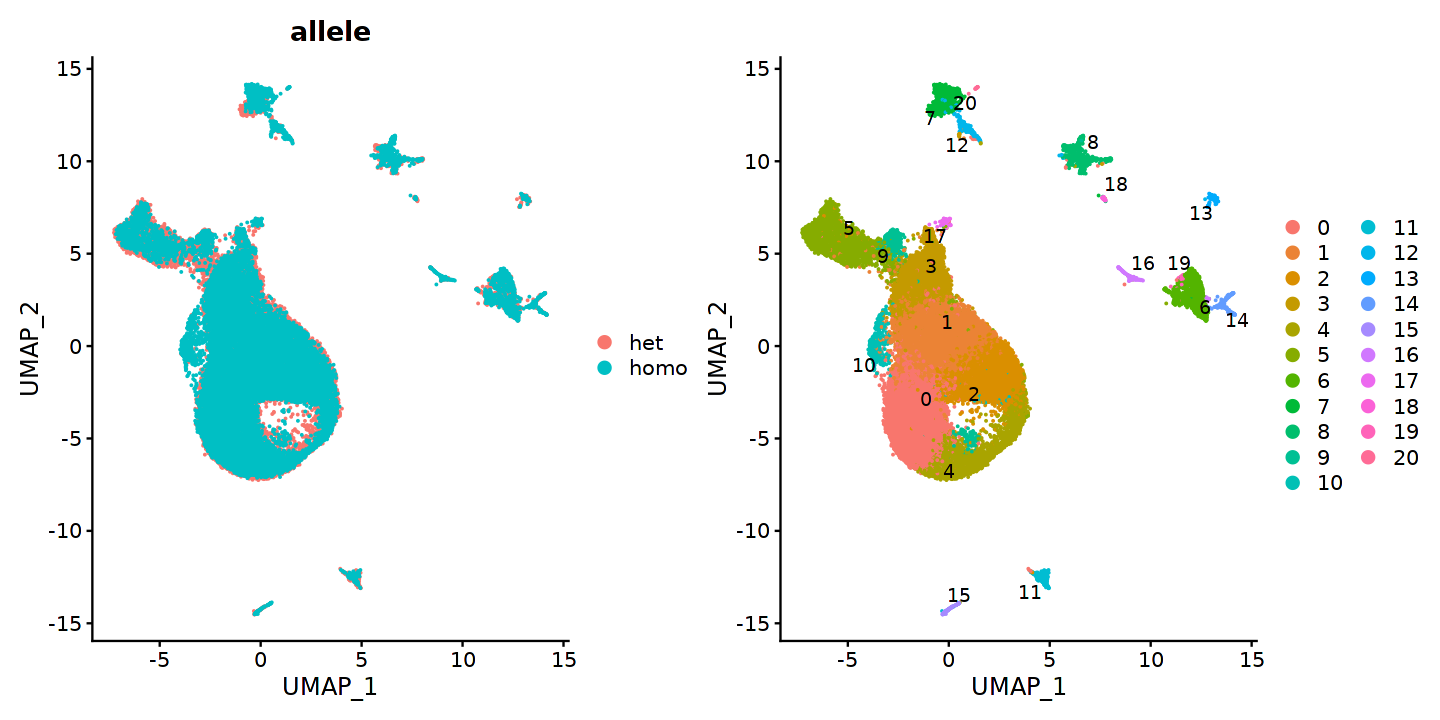

In [147]:
options(repr.plot.height=6, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(tumor.combined.remove.cc, reduction = "umap", group.by = 'allele')
p2 <- DimPlot(tumor.combined.remove.cc, reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

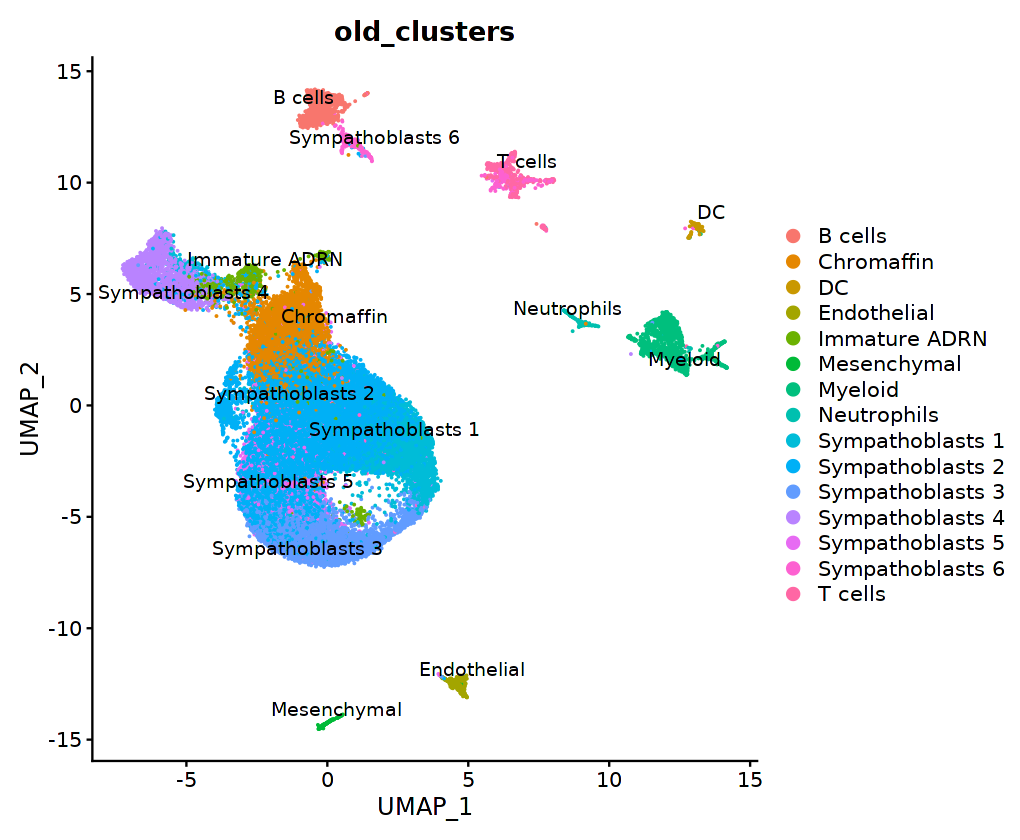

In [148]:
tumor.combined.remove.cc$old_clusters = old.annot[colnames(tumor.combined.remove.cc)]
options(repr.plot.height=7, repr.plot.width=8.5, res=150 ) 
DimPlot(tumor.combined.remove.cc, reduction = "umap", 
        group.by = 'old_clusters',
        label = TRUE, repel = TRUE)

## Marker genes

objects
tumor.combined -- normal integration

tumor.combined.f.wocc -- don't do anything

tumor.combined.f.cc -- regress cell-cycle gene

tumor.combined.f -- regress difference of s and g2m genes

tumor.combined.remove.cc -- remove cc genes

In [151]:
dplist = list()
dplist[[1]] = DimPlot(tumor.combined.f.wocc, reduction = "umap", 
        group.by = 'old_clusters',
        label = TRUE, repel = TRUE) + ggtitle('Without cc regression')
dplist[[2]] = DimPlot(tumor.combined.f.cc, reduction = "umap", 
        group.by = 'old_clusters',
        label = TRUE, repel = TRUE) + ggtitle('With cc regression')
dplist[[3]] = DimPlot(tumor.combined.f, reduction = "umap", 
        group.by = 'old_clusters',
        label = TRUE, repel = TRUE)  + ggtitle('With cc difference regression')
dplist[[4]] = DimPlot(tumor.combined.remove.cc, reduction = "umap", 
        group.by = 'old_clusters',
        label = TRUE, repel = TRUE) + ggtitle('Remove cc genes from raw')

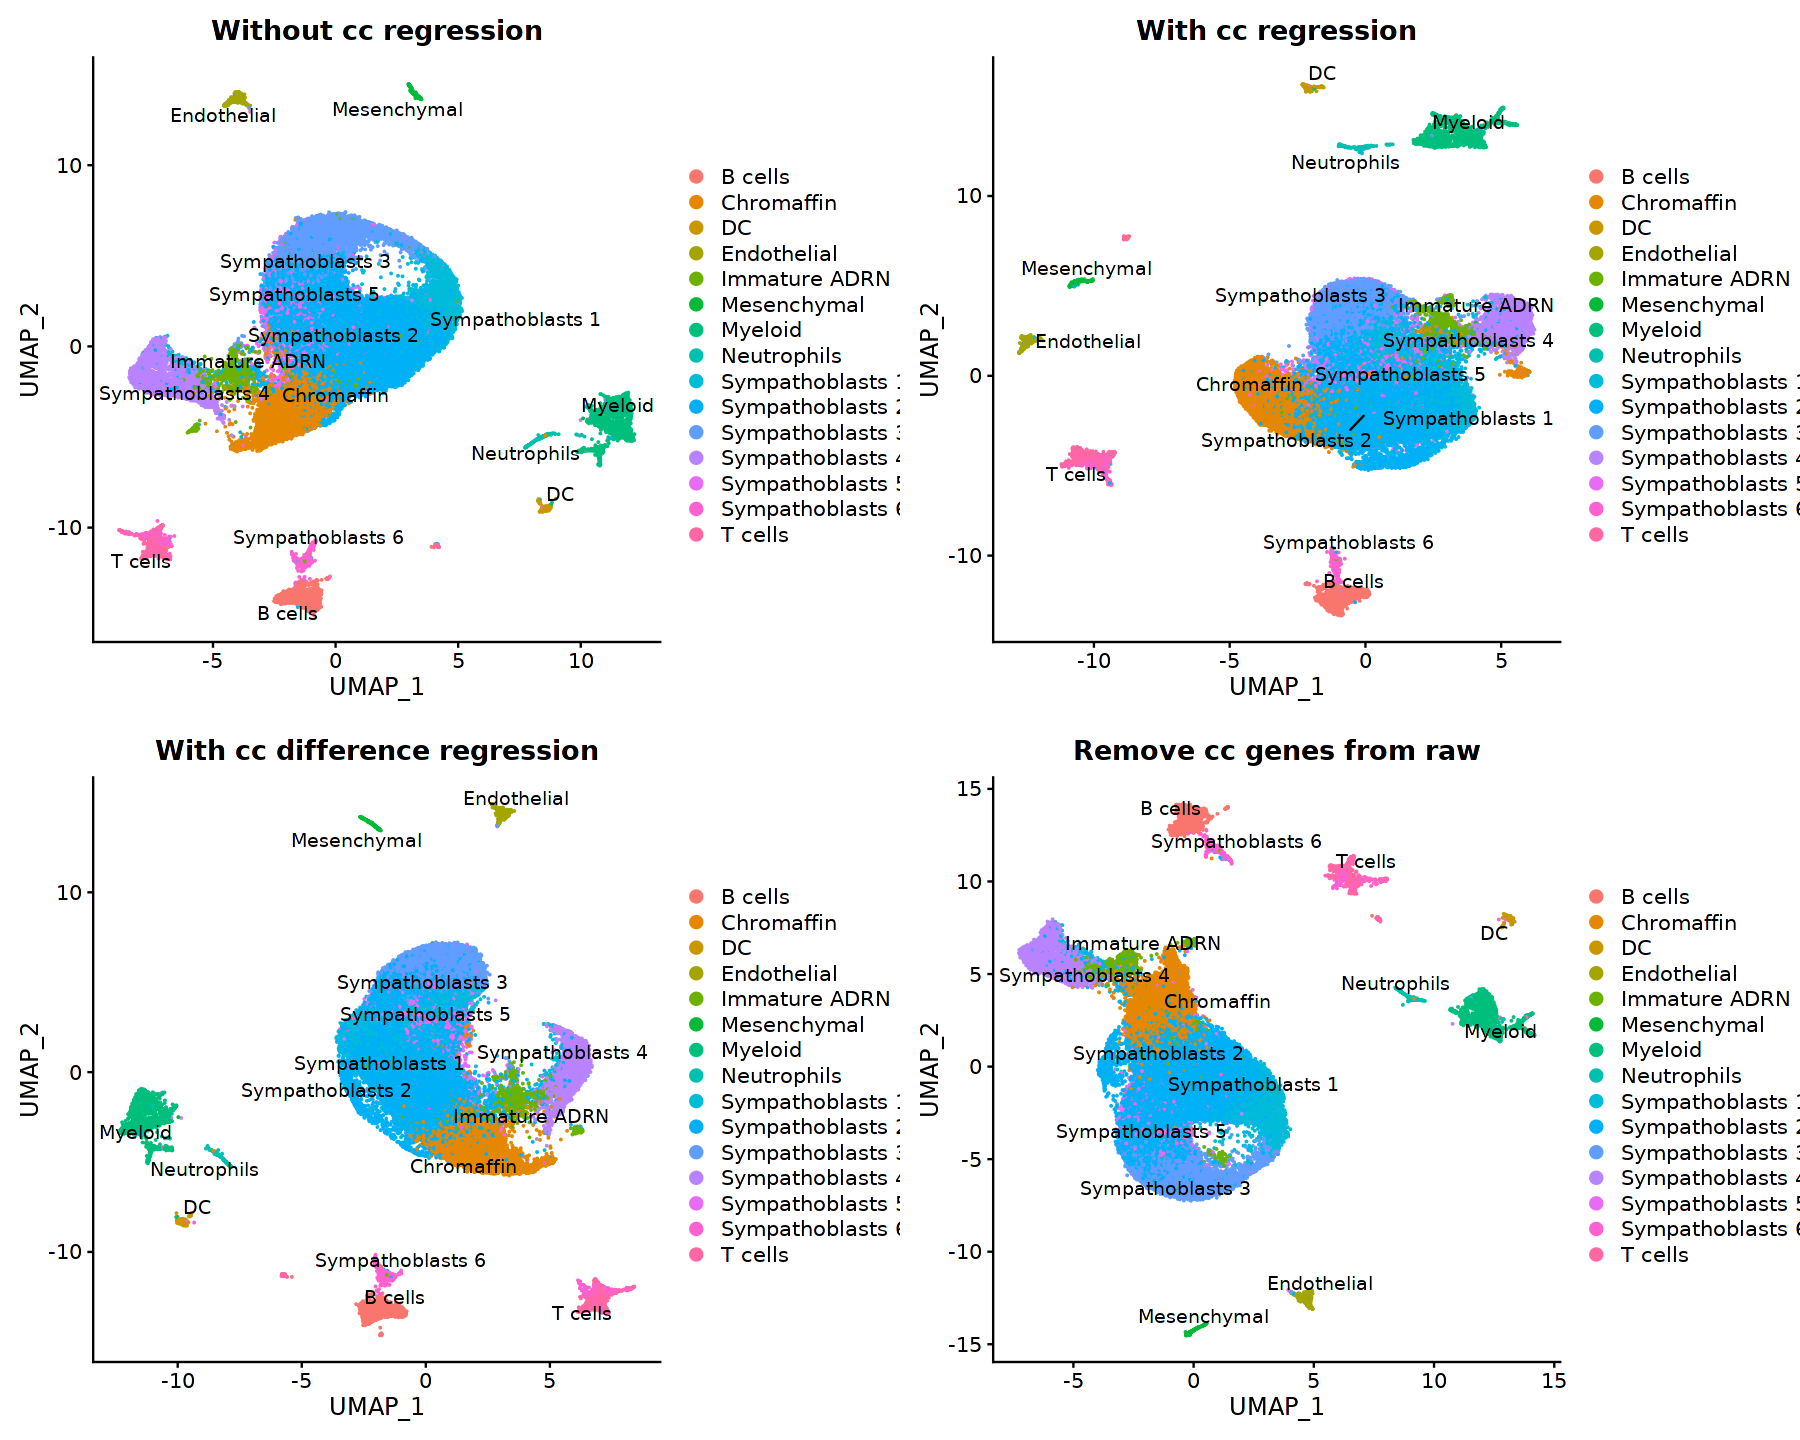

In [152]:
options(repr.plot.height=12, repr.plot.width=15, res=150 ) 
cowplot::plot_grid(plotlist = dplist, ncol = 2)

In [155]:
dplist = list()
dplist[[1]] = DimPlot(tumor.combined.f.wocc, reduction = "umap", 
        label = TRUE, repel = TRUE) + ggtitle('Without cc regression')
dplist[[2]] = DimPlot(tumor.combined.f.cc, reduction = "umap", 
        label = TRUE, repel = TRUE) + ggtitle('With cc regression')
dplist[[3]] = DimPlot(tumor.combined.f, reduction = "umap", 

        label = TRUE, repel = TRUE)  + ggtitle('With cc difference regression')
dplist[[4]] = DimPlot(tumor.combined.remove.cc, reduction = "umap", 
        
        label = TRUE, repel = TRUE) + ggtitle('Remove cc genes from raw')

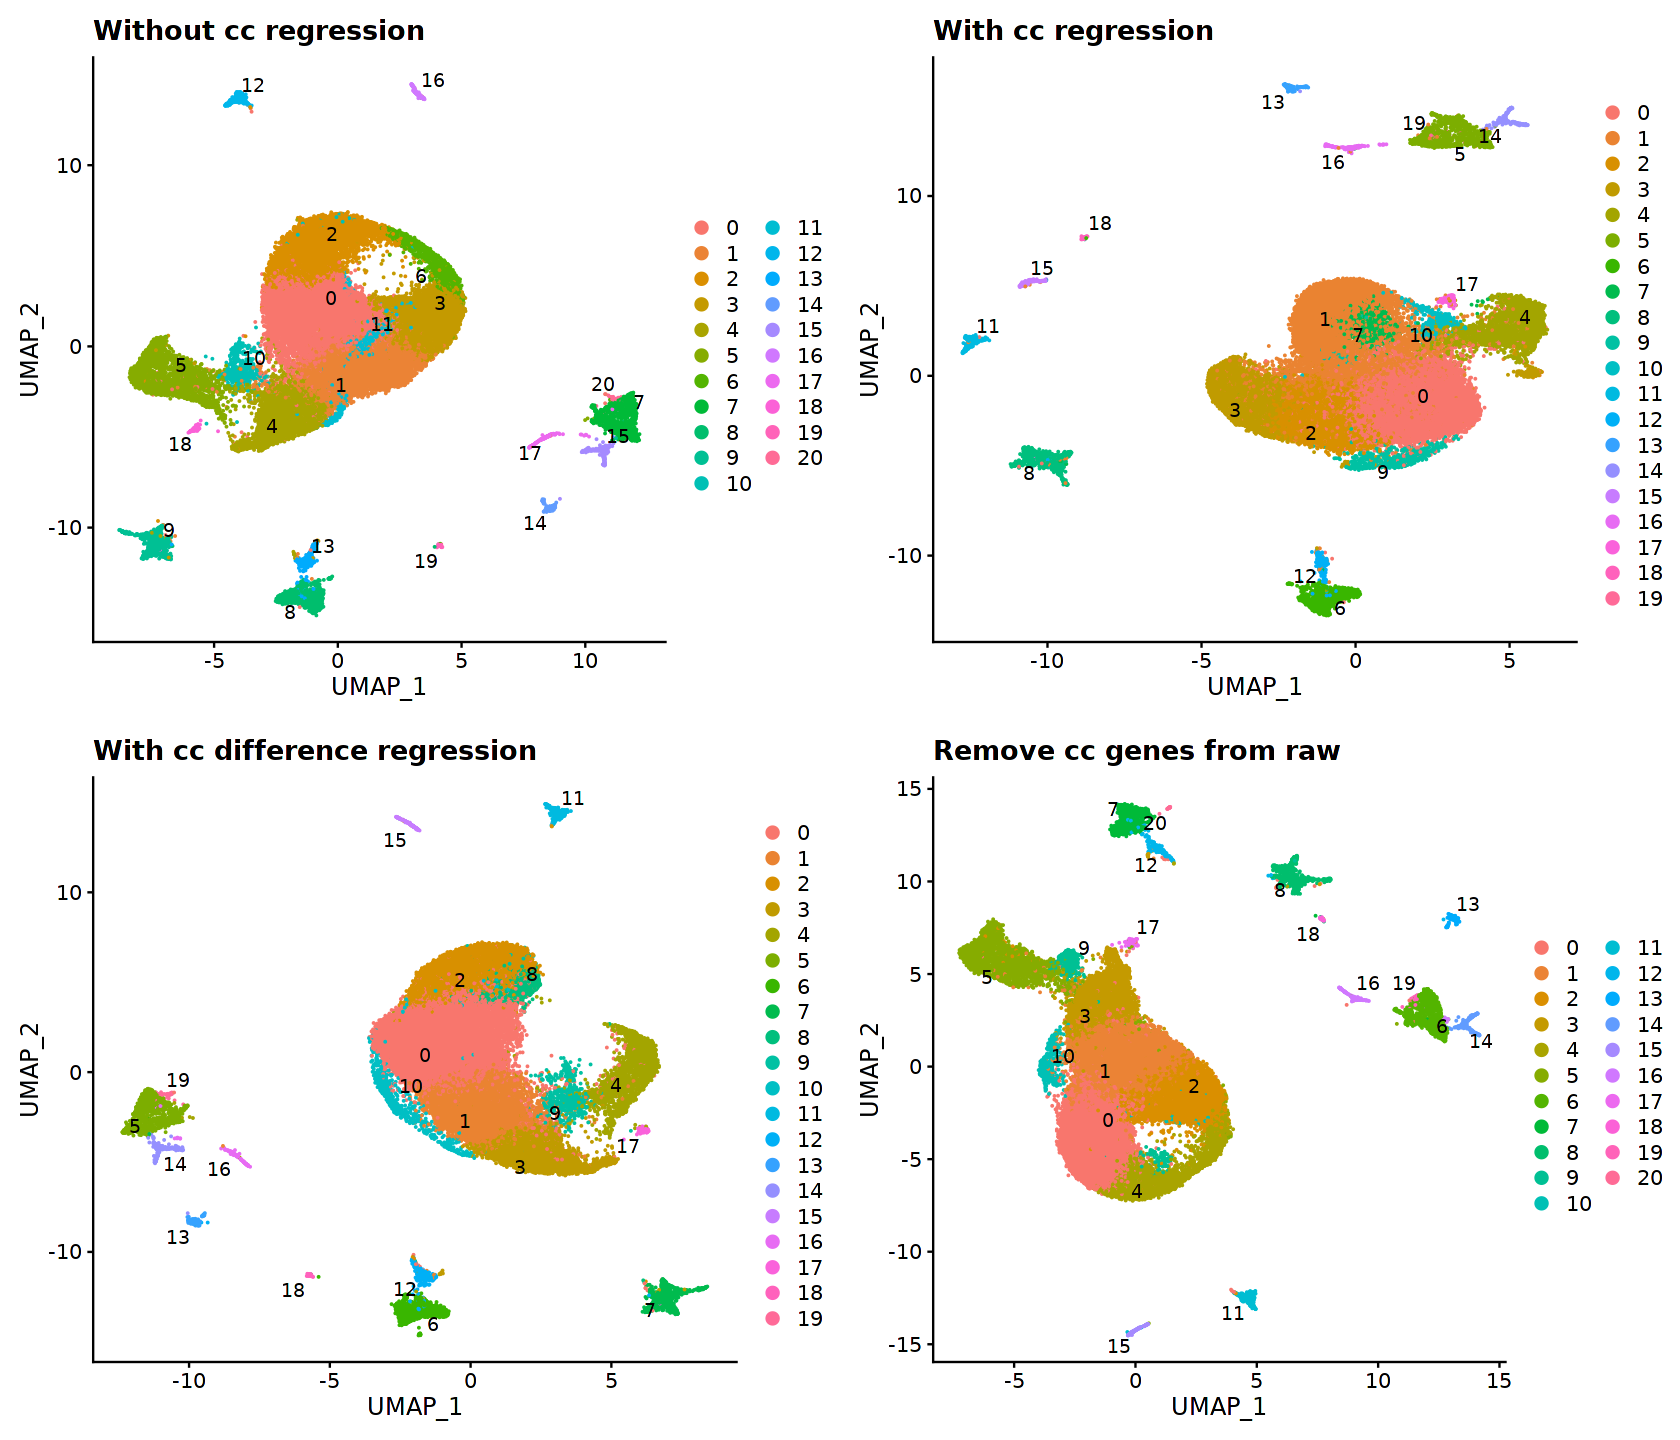

In [156]:
options(repr.plot.height=12, repr.plot.width=14, res=150 ) 
cowplot::plot_grid(plotlist = dplist, ncol = 2)

In [415]:
source('../scripts/SeuratRun.r')
tmp.p2 = covert_seurat_to_pagoda_app2(
    tumor.combined.f.wocc,
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results',
        '/seurat/Neuroblastoma_Mouse_5_Sample_New.bin'
    ),
    'Neuroblastoma_Mouse_5_Sample_New',
    n.cores = 20
)

40044 cells, 18780 genes; normalizing ... 

Using plain model 

Winsorizing ... 

log scale ... 

done.


calculating variance fit ...

 using gam 

2751 overdispersed genes ... 2751

persisting ... 

done.

running PCA using 3000 OD genes .

.

.

.

 done




creating space of type angular done
adding data ... done
building index ... done
querying ... done
creating space of type angular done
adding data ... done
building index ... done
querying ... done


Using seurat_cluster clustering for PCA space




In [416]:
source('../scripts/SeuratRun.r')
tmp.p2 = covert_seurat_to_pagoda_app2(
    tumor.combined.remove.cc,
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results',
        '/seurat/Neuroblastoma_Mouse_5_Sample_Without_CC_Genes.bin'
    ),
    'Neuroblastoma_Mouse_5_Sample_Without_CC_Genes',
    n.cores = 20
)

40044 cells, 18686 genes; normalizing ... 

Using plain model 

Winsorizing ... 

log scale ... 

done.


calculating variance fit ...

 using gam 

2694 overdispersed genes ... 2694

persisting ... 

done.

running PCA using 3000 OD genes .

.

.

.

 done




creating space of type angular done
adding data ... done
building index ... done
querying ... done
creating space of type angular done
adding data ... done
building index ... done
querying ... done


Using seurat_cluster clustering for PCA space




In [153]:
int.objs = c(tumor.combined.f.wocc,
             tumor.combined.f.cc,
             tumor.combined.f,
             tumor.combined.remove.cc
            )

In [417]:
parent_folder = "/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/"
saveRDS(
    tumor.combined.f.wocc,
    glue::glue(
        parent_folder,
        'Neuroblastoma_Mouse_5_Sample_New.rds'
    )
)
saveRDS(
    tumor.combined.f.cc,
    glue::glue(
        parent_folder,
        'Neuroblastoma_Mouse_5_Sample_CC_regressed.rds'
    )
)
saveRDS(
    tumor.combined.f,
    glue::glue(
        parent_folder,
        'Neuroblastoma_Mouse_5_Sample_CC_difference.rds'
    )
)

saveRDS(
    tumor.combined.remove.cc,
    glue::glue(
        parent_folder,
        'Neuroblastoma_Mouse_5_Sample_Without_CC_Genes.rds'
    )
)

ERROR: Error in eval(expr, envir, enclos): object 'tumor.combined.f.wocc' not found


In [154]:
marker.genes = lapply(X = int.objs, FUN = function(x){
     FindAllMarkers(
         x, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
})

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 0

Calculating c

In [200]:
marker.genes[[3]] %>% group_by(cluster) %>%
    top_n(n = 50, wt = avg_log2FC) %>% head

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene 
1 0     0.9175475  0.827 0.687 0         0       CDC20
2 0     0.6911779  0.929 0.830 0         0       UBE2C
3 0     0.6355544  0.963 0.861 0         0       NEFM 
4 0     0.6242725  0.968 0.879 0         0       NEFL 
5 0     0.5965681  0.698 0.541 0         0       UNG  
6 0     0.5864196  0.909 0.759 0         0       CENPA

In [197]:
saveRDS(
    marker.genes,
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/',
        'marker_genes.rds'
    )
)

In [ ]:
saveR

In [203]:
write.csv(
    marker.genes[[3]] %>% group_by(cluster) %>%
    top_n(n = 100, wt = avg_log2FC),
    file = glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/',
        'regress_difference_markers_top_100.csv'
    ),
    quote = F
)

In [204]:
write.csv(
    marker.genes[[4]] %>% group_by(cluster) %>%
    top_n(n = 100, wt = avg_log2FC),
    file = glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/',
        'remove_cc_markers_top_100.csv'
    ),
    quote = F
)

In [166]:
top_markers = lapply(marker.genes, function(x){
    x %>%
    group_by(cluster) %>%
    top_n(n = 1, wt = avg_log2FC)
})

In [169]:
obj = int.objs[[1]]

In [173]:
store_seurat = function(obj,out_dir){
    obj_meta_data = merge(
        obj@meta.data,
        obj@reductions$umap@cell.embeddings %>% data.frame,
        by = "row.names"
    )
    dir.create(out_dir, recursive = TRUE)
    write.csv(
        obj_meta_data,
        glue::glue(
            out_dir,
            '/meta_data.csv'
        ),
        row.names = FALSE
    )
    write.csv(
        obj@reductions$pca@cell.embeddings,
        file = glue::glue(
            out_dir,
            '/pca.csv'
        ),
        quote = F,
        row.names = F
    )
    counts_matrix <- GetAssayData(obj, assay='RNA', slot='counts')
    writeMM(
        counts_matrix,
        file = glue::glue(
            out_dir,
            '/counts.mtx'
        )
    )
    write.table(
        data.frame('gene' = rownames(counts_matrix)),
        file = glue::glue(
            out_dir,
            '/genes.csv'
        ),
        quote = F,
        row.names = F,
        col.names = F
    )
    
}

In [186]:
store_var_genes = function(obj,out_dir){
    write.table(
        data.frame('gene' = VariableFeatures(obj)),
        file = glue::glue(
            out_dir,
            '/var_genes.csv'
        ),
        quote = F,
        row.names = F,
        col.names = F
    )
}

In [386]:
store_seurat(
    int.objs[[3]],
    '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_difference'
)

Warning message in dir.create(out_dir, recursive = TRUE):
“'/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_difference' already exists”


In [391]:
store_seurat(
    tumor.combined.f,
    '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_difference'
)

Warning message in dir.create(out_dir, recursive = TRUE):
“'/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_difference' already exists”


In [187]:
store_var_genes(
    int.objs[[3]],
    '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_difference'
)

In [175]:
store_seurat(
    int.objs[[4]],
    '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_remove'
)

In [188]:
store_var_genes(
    int.objs[[4]],
    '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2/cc_remove'
)

In [190]:
cc.genes = union( s.genes.selected, g2m.genes.selected )

In [194]:
write.table(
    data.frame('gene' = cc.genes),
    file = glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat_2',
        '/cc_genes.csv'
    ),
    quote = F,
    row.names = F,
    col.names = F
)

In [71]:
tumor.combined.f.cc.p2 = covert_seurat_to_pagoda_app(
    tumor.combined.f.cc,
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results',
        '/seurat_2/Neuroblastoma_Mouse_5_Samples_CC.bin'
    ),
    assay_name = "integrated",
    app.title='Neuroblastoma_Mouse_5_Samples',
    n.cores=20
)

ERROR: Error in tumor.combined.f@assays["integrated"]@counts %>% dim: trying to get slot "counts" from an object of a basic class ("list") with no slots


In [ ]:
tumor.combined.f.cc.p2 = covert_seurat_to_pagoda_app(
    tumor.combined.f.cc,
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results',
        '/seurat_2/Neuroblastoma_Mouse_5_Samples_CC.bin'
    ),
    assay_name = "integrated",
    app.title='Neuroblastoma_Mouse_5_Samples',
    n.cores=20
)

In [91]:
tumor.combined.f@assays$RNA@counts[VariableFeatures(tumor.combined.f),] %>% dim

[1]  2000 40044

In [90]:
VariableFeatures(tumor.combined.f) %>% length

[1] 2000

In [ ]:
tumor.combined.f@assays$integrated

In [51]:
top_genes = c('Cdc20','Nefl',
              'Top2a','Ccnb1',
              'Gmnn','Th','Sox11',
              'Mgp','Cdh5','Igkc',
              'Cd3d','Clec4a3',
              'S100a8','Clec10a',
              'Siglech','Hbb-bs')

In [56]:
top_genes = intersect(
    toupper(top_genes),
    rownames(tumor.combined.f.cc)
)

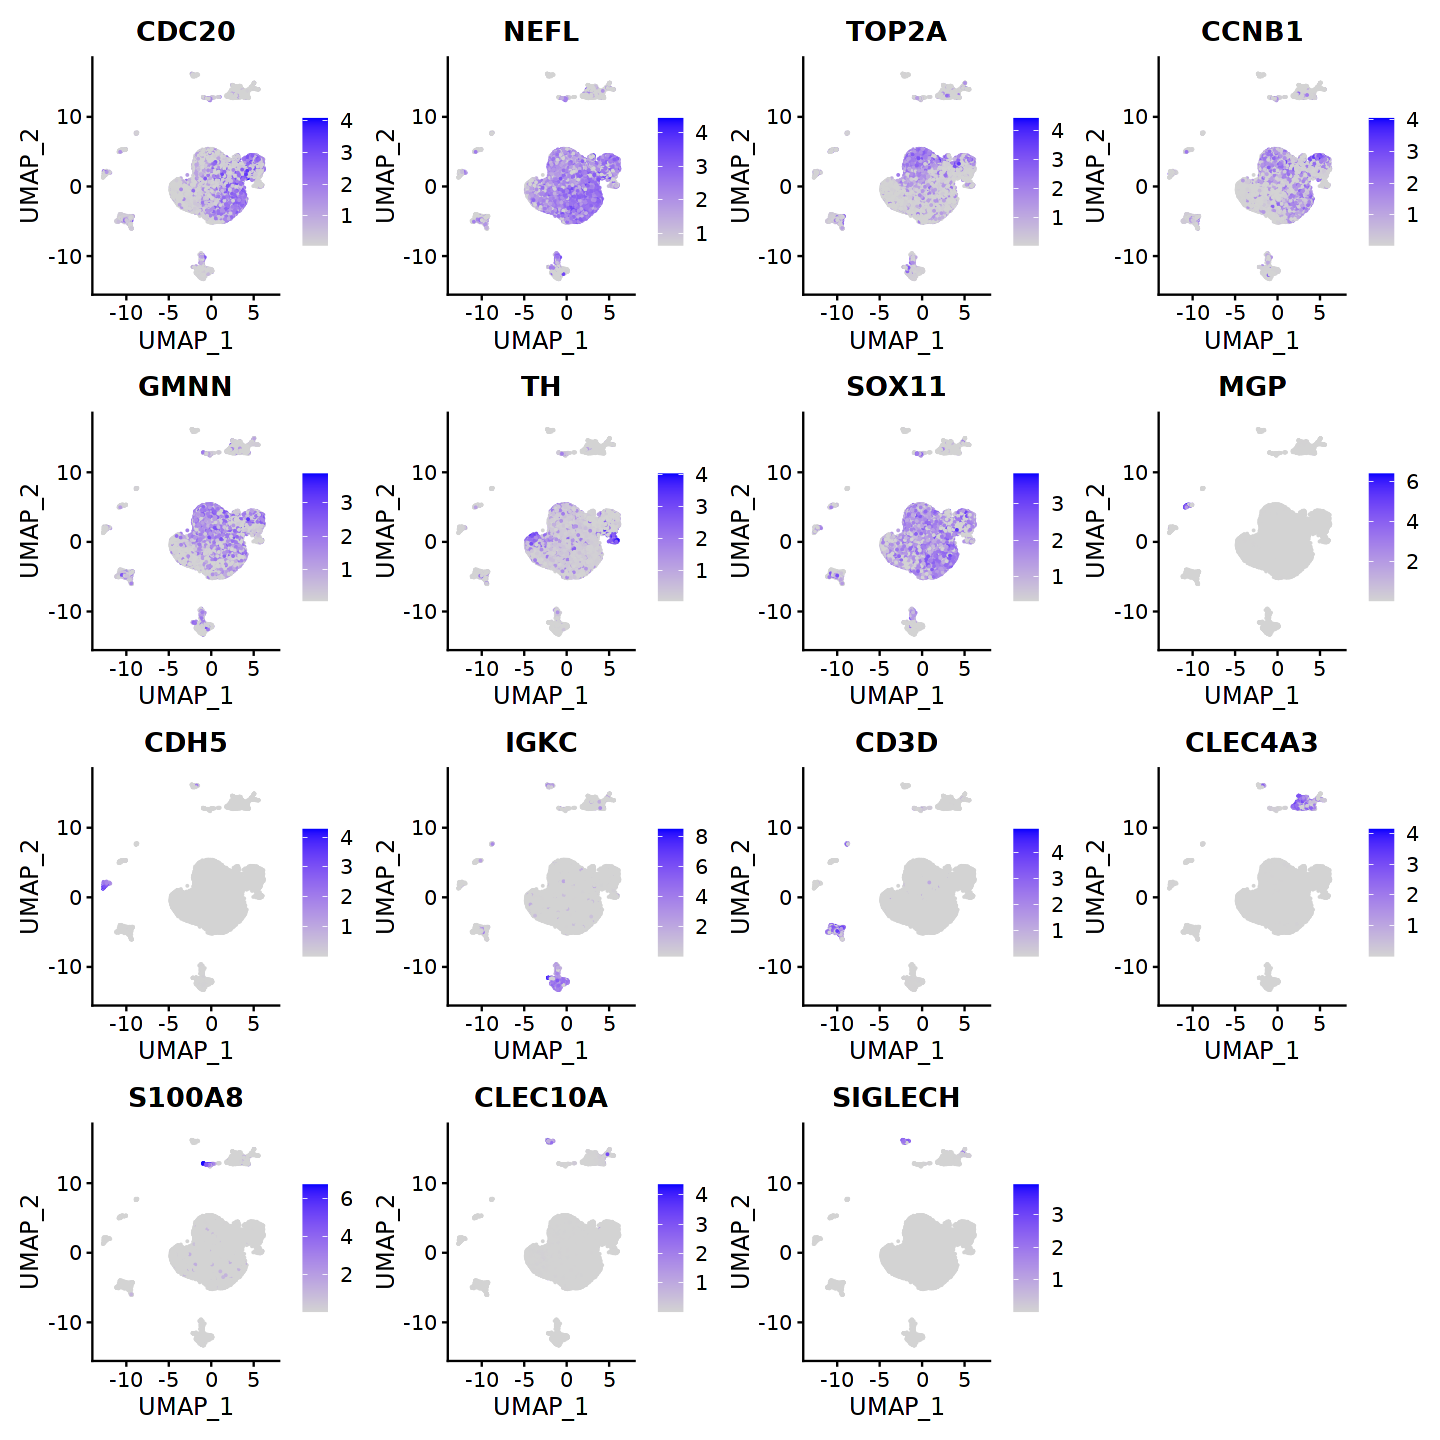

In [64]:
options(repr.plot.height=12, repr.plot.width=12, res=150 ) 
FeaturePlot(tumor.combined.f.cc, 
            features = top_genes,
            min.cutoff = "q9")

In [ ]:
tumor.combined.annotation = tumor.combined.wo.cc$orig.ident
tumor.combined.annotation[grepl("het", tumor.combined.wo.cc$orig.ident)] = 'het'
tumor.combined.annotation[grepl("homo", tumor.combined.wo.cc$orig.ident)] = 'homo'

tumor.combined.wo.cc$allele = tumor.combined.annotation

options(repr.plot.height=6, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(tumor.combined.wo.cc, reduction = "umap", group.by = 'allele')
p2 <- DimPlot(tumor.combined.wo.cc, reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [22]:
seurat.obj.list

$het1_tumor
An object of class Seurat 
17222 features across 12443 samples within 1 assay 
Active assay: RNA (17222 features, 4000 variable features)

$het2_tumor
An object of class Seurat 
17267 features across 6663 samples within 1 assay 
Active assay: RNA (17267 features, 4000 variable features)

$homo1_tumor
An object of class Seurat 
16567 features across 6302 samples within 1 assay 
Active assay: RNA (16567 features, 4000 variable features)

$homo2_tumor
An object of class Seurat 
16896 features across 3878 samples within 1 assay 
Active assay: RNA (16896 features, 4000 variable features)

$homo3_tumor
An object of class Seurat 
16796 features across 10758 samples within 1 assay 
Active assay: RNA (16796 features, 4000 variable features)


In [14]:
raw.count.objs = lapply(tumor.con$samples, function(x){
  raw.count = x$misc$rawCounts
  mito.genes = grep(pattern = "^mt-", x = colnames(raw.count), value = TRUE, ignore.case = TRUE)
  rpl.genes = grep(pattern = "^rpl", x = colnames(raw.count), value = TRUE, ignore.case = TRUE)
  rps.genes = grep(pattern = "^rps", x = colnames(raw.count), value = TRUE, ignore.case = TRUE)
  genes.removed = union(mito.genes, rpl.genes)
  genes.removed = union(genes.removed, rps.genes)
  raw.count = raw.count[, setdiff(colnames(raw.count), genes.removed)]
  colnames(raw.count) = toupper( colnames(raw.count) )
  
  t(raw.count)
})

In [63]:
seurat.obj.list = lapply(names(raw.count.objs),function(sample.name)  CreateSeuratObject(
    counts = raw.count.objs[[sample.name]], 
    project = paste("mnb5",sample.name, sep="_"), 
    min.cells = 3, 
    min.features = 500
))

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”


In [64]:
names(seurat.obj.list) = names(raw.count.objs)

In [65]:
s.genes.selected = intersect(seurat.obj.list[[1]] %>% rownames,  s.genes )
g2m.genes.selected = intersect(seurat.obj.list[[1]] %>% rownames,  g2m.genes )

Merge the het vs. homo dataset

In [66]:
tumor.combined = merge(
    seurat.obj.list[[1]], 
    y = seurat.obj.list[2:5], 
    merge.data = T
)

tumor.combined.annotation = tumor.combined$orig.ident
tumor.combined.annotation[grepl("het", tumor.combined$orig.ident)] = 'het'
tumor.combined.annotation[grepl("homo", tumor.combined$orig.ident)] = 'homo'

tumor.combined$allele = tumor.combined.annotation
ifnb.list <- SplitObject( tumor.combined , split.by = "allele")

In [69]:
ifnb.list = lapply(X = ifnb.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 4000)
})

In [86]:
features <- SelectIntegrationFeatures(object.list = ifnb.list, nfeatures = 4000)

In [89]:
"SOX11" %in% features 

[1] TRUE

In [74]:
tumor.anchors <- FindIntegrationAnchors(
    object.list = ifnb.list, 
    anchor.features = features
)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 52882 anchors

Filtering anchors

	Retained 11453 anchors



In [75]:
# this command creates an 'integrated' data assay
tumor.combined <- IntegrateData(anchorset = tumor.anchors)

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [78]:
DefaultAssay(tumor.combined) <- "integrated"

In [82]:
tumor.combined <-  CellCycleScoring(
    tumor.combined, 
    s.features = s.genes.selected, 
    g2m.features = g2m.genes.selected, 
    set.ident = TRUE
)

Warning message:
“The following features are not present in the object: CDCA7, WDR76, PCNA, POLA1, NASP, RFC2, MCM2, BLM, POLD3, RRM1, BRIP1, UBR7, MSH2, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: LBR, ANP32E, NCAPD2, TMPO, CTCF, RANGAP1, GTSE1, CBX5, not searching for symbol synonyms”


In [90]:
tumor.combined <-  ScaleData(
        tumor.combined, 
        vars.to.regress = c("S.Score", "G2M.Score"),
        features = VariableFeatures(tumor.combined)
    )

Regressing out S.Score, G2M.Score

Centering and scaling data matrix



In [94]:
tumor.combined = RunPCA(tumor.combined, npcs=30)
tumor.combined = RunUMAP(tumor.combined, reduction="pca",dims=1:30)

PC_ 1 
Positive:  STMN1, MYCN, STMN2, DLK1, PRDX2, MEG3, NNAT, PCSK1N, NME1, CHGB 
	   TUBB2B, RAN, CDK4, BEX2, NEFL, DUT, GLRX5, MLLT11, SRM, UBE2S 
	   BEX1, NEFM, HMGB3, ZDBF2, MT1, DYNLL1, PFN2, CCND1, RANBP1, CACNA2D1 
Negative:  SRGN, CYBA, CD52, B2M, CTSS, ARPC1B, TYROBP, PTPRC, LAPTM5, FCER1G 
	   H2-D1, PLAC8, ARHGDIB, CORO1A, CYTIP, H2-K1, LGALS3, RAC2, GMFG, TMSB4X 
	   LCP1, S100A11, LYZ2, FXYD5, CYBB, GNGT2, IFITM3, NCF4, SPI1, LSP1 
PC_ 2 
Positive:  LYZ2, FCER1G, LST1, IL1B, CD300C2, PLA2G7, CLEC4A3, CD14, TYROBP, ALOX5AP 
	   CD300A, CSF1R, WFDC17, CLEC4E, HP, MS4A6C, LGALS3, MSRB1, CLEC4A1, IFITM6 
	   EMILIN2, METRNL, IGSF6, IFITM3, CD68, TREML4, FCGR3, IFITM2, SPI1, CCL6 
Negative:  GIMAP6, CD79A, IGKC, CCR7, PTPRCAP, ETS1, GM8369, IGHM, GIMAP1, CD79B 
	   LY6D, IGLC2, EBF1, IGHD, MS4A1, CD37, LTB, GIMAP3, MZB1, SLAMF6 
	   GIMAP4, IGLC3, BANK1, H2-OB, MEF2C, CD2, STK17B, SHISA5, ABLIM1, 4930523C07RIK 
PC_ 3 
Positive:  IGKC, CD79A, CD74, IGHM, STK17B, H2-EB1, H2-AA,

In [95]:
tumor.combined = FindNeighbors(tumor.combined, reduction="pca", dims=1:30)
tumor.combined = FindClusters(tumor.combined, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 40044
Number of edges: 1140455

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8768
Number of communities: 18
Elapsed time: 9 seconds


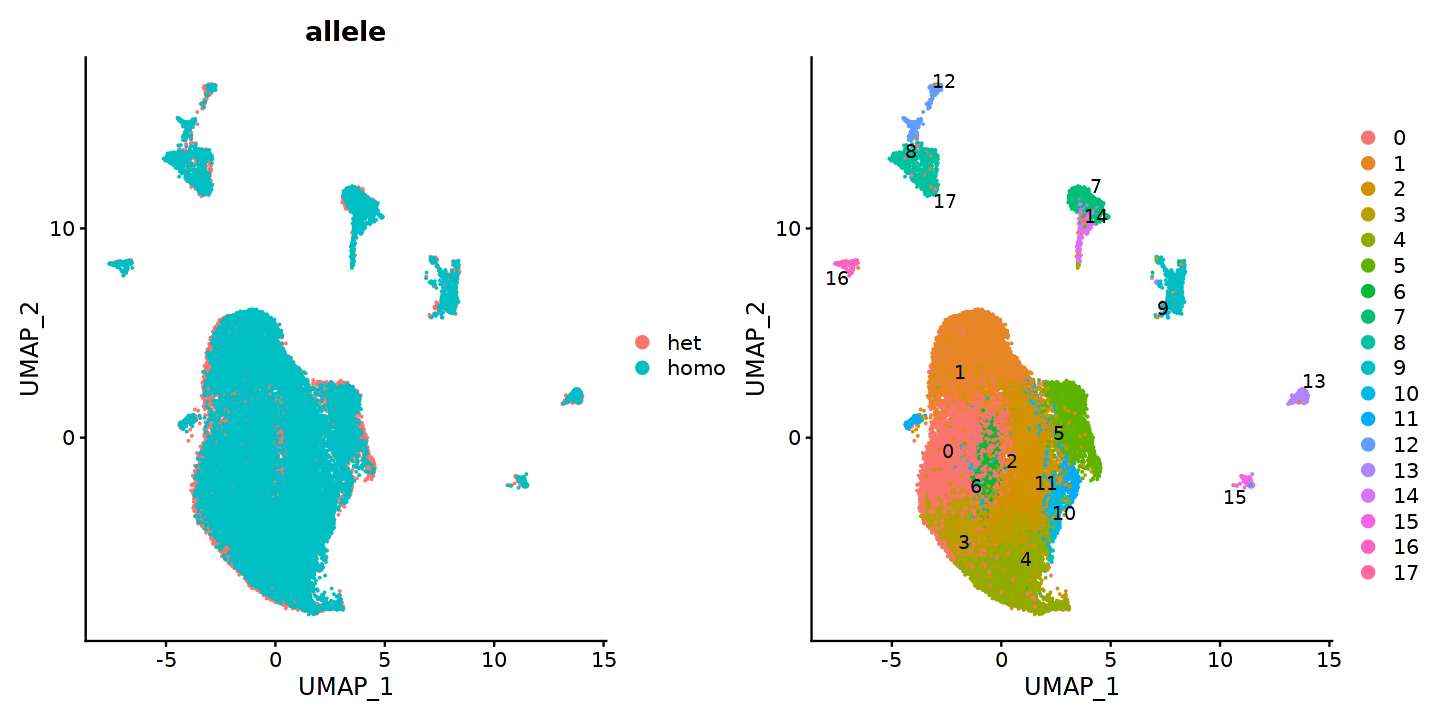

In [96]:
options(repr.plot.height=6, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(tumor.combined, reduction = "umap", group.by = 'allele')
p2 <- DimPlot(tumor.combined, reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [99]:
old.meta.data = read.csv(
    glue::glue(
         '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat/',
        'neuroblast_5_samples_cc_regressed_meta_data.csv'
    ),
    row.names = 1
)

old.annot = old.meta.data$new_clusters
names(old.annot) = rownames(old.meta.data)
tumor.combined$old_clusters = old.annot[colnames(tumor.combined)]

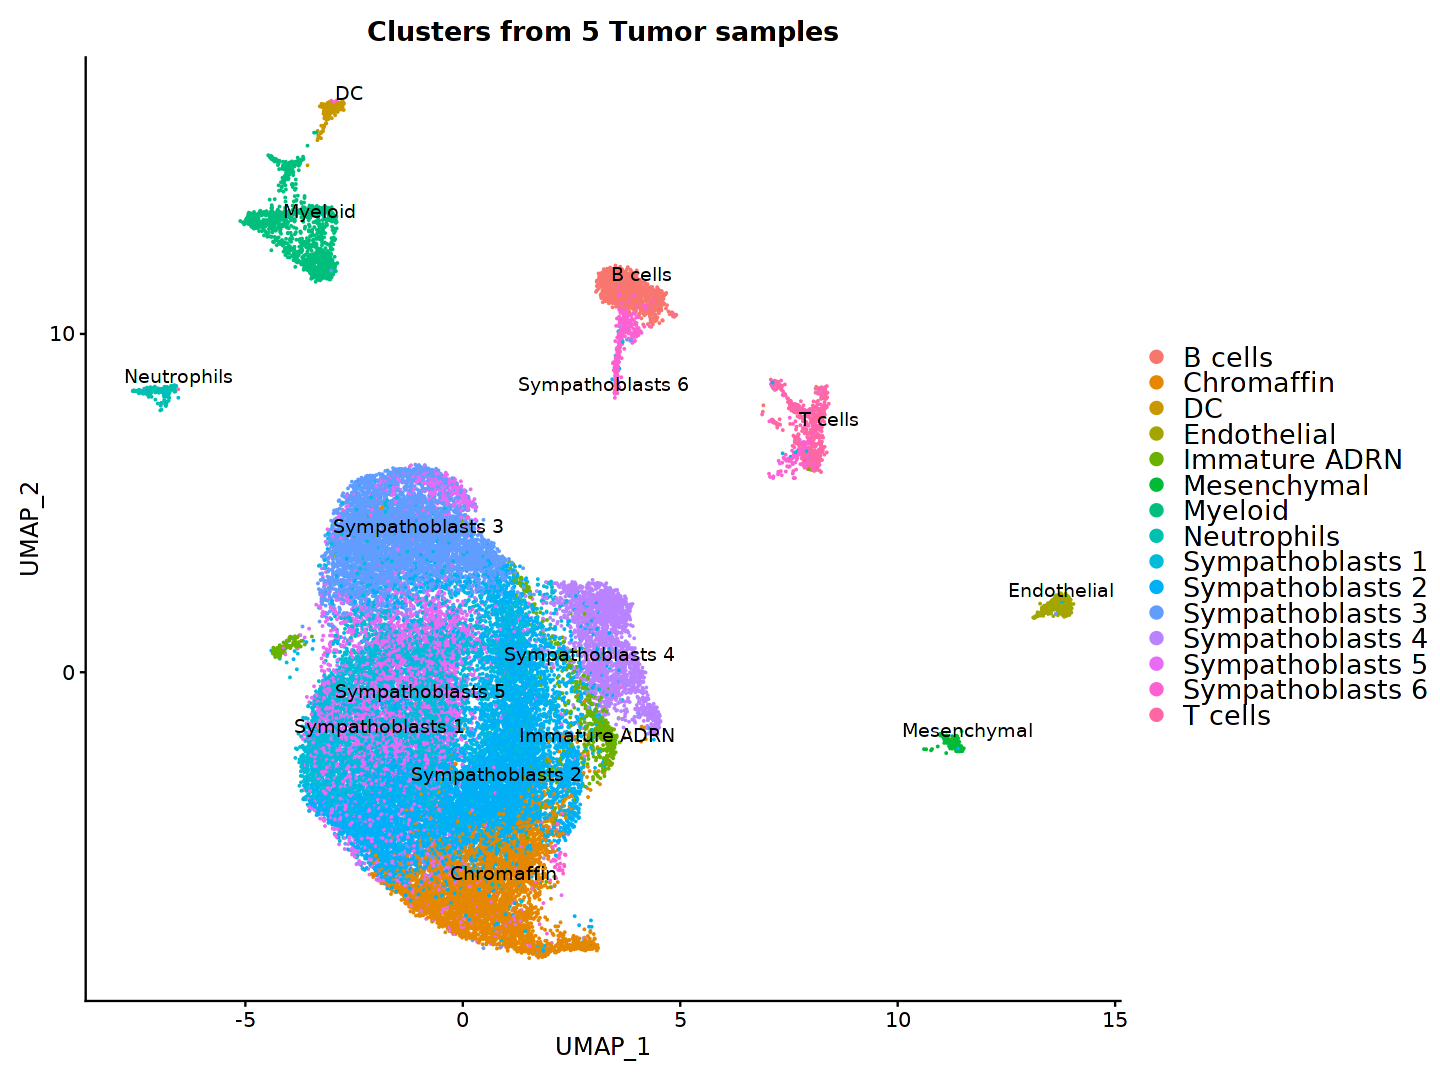

In [110]:
library(ggplot2)
options(repr.plot.height=9, repr.plot.width=12, res=150 ) 
DimPlot(tumor.combined, reduction = "umap",
        group.by = 'old_clusters',
        #cols = scales::hue_pal()(length(s5.order %>% unique )),
        label = TRUE, 
        repel = TRUE,
        label.size = 4,
       ) + 
    ggtitle('Clusters from 5 Tumor samples') +
    theme(
        legend.title = element_text(size=16), #change legend title font size
        legend.text = element_text(size=16)) #change legend text font size

In [62]:
features <- SelectIntegrationFeatures(object.list = ifnb.list)

No variable features found for object1 in the object.list. Running FindVariableFeatures ...

No variable features found for object2 in the object.list. Running FindVariableFeatures ...



In [35]:
neuro.anchors <- FindIntegrationAnchors(
    object.list = ifnb.list, 
    anchor.features = features)
# this command creates an 'integrated' data assay
neuro.combined <- IntegrateData(anchorset = neuro.anchors)
DefaultAssay(neuro.combined) <- "integrated"

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 46414 anchors

Filtering anchors

	Retained 6195 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [56]:
neuro.combined@assays$integrated

Assay data with 2000 features for 40044 cells
Top 10 variable features:
 LYZ2, MGP, IGFBP7, CD74, IL1B, SPARC, CCL4, S100A9, CXCL2, FABP4 

In [47]:
#SR = NormalizeData(SR)

In [ ]:
reg_out = function(x){
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 8000)
    x <- ScaleData(x, features = rownames(x))
    x <- RunPCA(
        x, 
        features = VariableFeatures(x), 
        ndims.print = 6:10, 
        nfeatures.print = 10
    )
    x <-  CellCycleScoring(
        x, 
        s.features = s.genes.selected, 
        g2m.features = g2m.genes.selected, 
        set.ident = TRUE
    )
    
    x <-  ScaleData(
        x, 
        vars.to.regress = c("S.Score", "G2M.Score"), 
        features = VariableFeatures(x)
    )
    x
    
}

In [33]:
DefaultAssay(neuro.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
neuro.combined <- ScaleData(neuro.combined, verbose = FALSE)
neuro.combined <- RunPCA(neuro.combined, npcs = 30, verbose = FALSE)
neuro.combined <- RunUMAP(neuro.combined, reduction = "pca", dims = 1:30)
neuro.combined <- FindNeighbors(neuro.combined, reduction = "pca", dims = 1:30)
neuro.combined <- FindClusters(neuro.combined, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
19:31:21 UMAP embedding parameters a = 0.9922 b = 1.112

19:31:21 Read 40044 rows and found 30 numeric columns

19:31:21 Using Annoy for neighbor search, n_neighbors = 30

19:31:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:31:28 Writing NN index file to temp file /tmp/RtmpKPGNpY/file47d326ae84fd

19:31:28 Searching Annoy index using 1 thread, search_k = 3000

19:31:43 Annoy recall = 100%

19:31:44 Commencing smooth kNN distance calibration using 1 thread

19:31:46 Initializing fr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 40044
Number of edges: 1359363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8781
Number of communities: 19
Elapsed time: 11 seconds


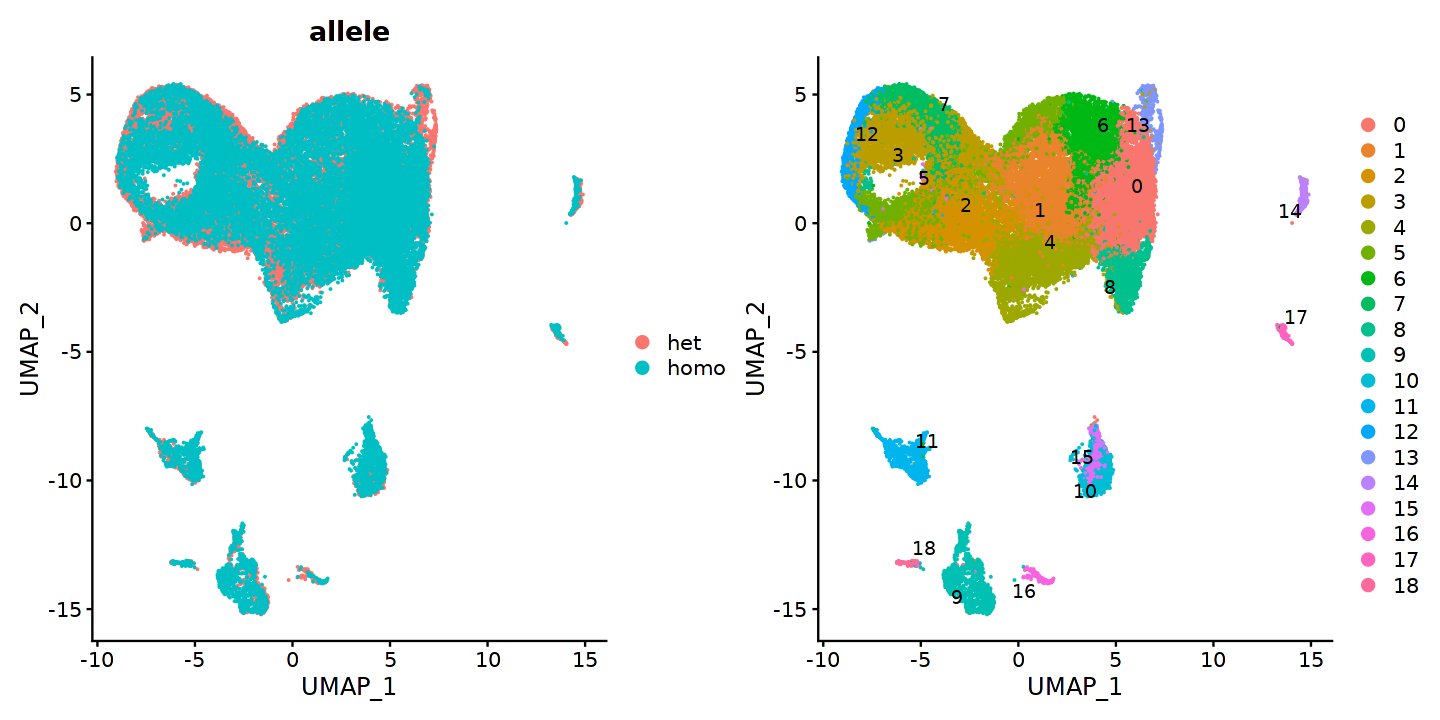

In [34]:
options(repr.plot.height=6, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(neuro.combined, reduction = "umap", group.by = 'allele')
p2 <- DimPlot(neuro.combined, reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [131]:
reg_out = function(x){
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
    x <- ScaleData(x, features = rownames(x))
    x <- RunPCA(
        x, 
        features = VariableFeatures(x), 
        ndims.print = 6:10, 
        nfeatures.print = 10
    )
    x <-  CellCycleScoring(
        x, 
        s.features = s.genes.selected, 
        g2m.features = g2m.genes.selected, 
        set.ident = TRUE
    )
    
    x <-  ScaleData(
        x, 
        vars.to.regress = c("S.Score", "G2M.Score"), 
        features = VariableFeatures(x)
    )
    x
    
}

In [ ]:
neuro.combined.reg = reg_out(neuro.combined)

In [102]:
saveRDS(
    neuro.combined, 
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results',
        '/seurat/neuroblast_5_samples_cc_regressed.rds'
    )
)

In [105]:
neuro.combined.p2 = covert_seurat_to_pagoda_app(
    neuro.combined,
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results',
        '/seurat/Neuroblastoma_Mouse_5_Samples.bin'
    ),
    app.title='Neuroblastoma_Mouse_5_Samples',
    n.cores=20
)

40044 cells, 18780 genes; normalizing ... 

Using plain model 

Winsorizing ... 

log scale ... 

done.


calculating variance fit ...

 using gam 

2751 overdispersed genes ... 2751

persisting ... 

done.

running PCA using 3000 OD genes .

.

.

.

 done




creating space of type angular done
adding data ... done
building index ... done
querying ... done


Estimating embeddings.


Warning message in p2$getEmbedding(type = "PCA", embeddingType = "tSNE", perplexity = perplexity, :
“Too many cells to pre-calculate correlation distances, switching to L2. Please consider using UMAP.”
running tSNE using 20 cores:




creating space of type angular done
adding data ... done
building index ... done
querying ... done


Using multilevel clustering for PCA space




In [106]:
saveRDS(neuro.combined.p2,
        glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results',
        '/seurat/Neuroblastoma_Mouse_5_Samples_Seurat_to_Pagoda.rds'
        ))

# Please find the app with 5 samples [here](http://pklab.med.harvard.edu/nikolas/pagoda2/frontend/current/pagodaURL/index.html?fileURL=http://pklab.med.harvard.edu/hirak/public_html/ThMYCN/Neuroblastoma_Mouse_5_Samples.bin)

### Make seurat object list from adrenal samples

In [59]:
file.names = c(
'adrenal_70' = '/home/hsarkar/Projects/ThMYCN/PMID33833454/GSM5067113_10x70.raw_feature_bc_matrix.h5',
'adrenal_71' = '/home/hsarkar/Projects/ThMYCN/PMID33833454/GSM5067114_10x71.raw_feature_bc_matrix.h5',
'adrenal_72' = '/home/hsarkar/Projects/ThMYCN/PMID33833454/GSM5067115_10x72.raw_feature_bc_matrix.h5'
)

raw.objs = lapply(names(file.names), function(fname){
  f = file.names[[fname]]
  raw.count = Read10X_h5(f)
  colnames(raw.count) = paste(fname, colnames(raw.count), sep="_")
  
  mito.genes = grep(pattern = "^mt-", x = rownames(raw.count), value = TRUE, ignore.case = TRUE)
  rpl.genes = grep(pattern = "^rpl", x = rownames(raw.count), value = TRUE, ignore.case = TRUE)
  rps.genes = grep(pattern = "^rps", x = rownames(raw.count), value = TRUE, ignore.case = TRUE)
  genes.removed = union(mito.genes, rpl.genes)
  genes.removed = union(genes.removed, rps.genes)
  raw.count = raw.count[setdiff(rownames(raw.count), genes.removed),]
  rownames(raw.count) = toupper( rownames(raw.count) )
  
  raw.count
})
names(raw.objs) = names(file.names)

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”


In [60]:
seurat.adrenal.obj.list = lapply(names(raw.objs),function(sample.name)  CreateSeuratObject(
    counts = raw.objs[[sample.name]],
    min.cells = 3, 
    min.features = 500
))

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”


In [61]:
names(seurat.adrenal.obj.list) = names(raw.objs)

In [62]:
s.genes.selected = intersect(seurat.adrenal.obj.list[[1]] %>% rownames,  s.genes )
g2m.genes.selected = intersect(seurat.adrenal.obj.list[[1]] %>% rownames,  g2m.genes )

In [63]:
seurat.adrenal.obj.list <- lapply(X = seurat.adrenal.obj.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
    x <- ScaleData(x, features = rownames(x))
    x <- RunPCA(
        x, 
        features = VariableFeatures(x), 
         ndims.print = 6:10, 
         nfeatures.print = 10
    )
    x <-  CellCycleScoring(
        x, 
        s.features = s.genes.selected, 
        g2m.features = g2m.genes.selected, 
        set.ident = TRUE
    )
    
    x <-  ScaleData(
        x, 
        vars.to.regress = c("S.Score", "G2M.Score"), 
        features = VariableFeatures(x))
})

Centering and scaling data matrix

PC_ 6 
Positive:  NTRK1, PPP1R1C, SCN9A, SYT13, ISL2, THSD7B, ISLR2, RD3, P2RX3, GAL 
Negative:  DBH, SYTL4, PHOX2A, DGKK, EPAS1, SLC18A1, HAND1, HAND2, SLC18A2, GCH1 
PC_ 7 
Positive:  LECT1, COL11A2, MATN1, ACAN, HAPLN1, CMTM5, COL9A3, NDRG2, 3110079O15RIK, COL2A1 
Negative:  TOP2A, UBE2C, CCNB1, TPX2, NUSAP1, BIRC5, CENPF, SPC25, CENPE, MKI67 
PC_ 8 
Positive:  ACAN, HAPLN1, COL11A2, MATN1, COL9A3, LECT1, PAPSS2, 3110079O15RIK, COL9A1, MIA 
Negative:  COL1A1, COL3A1, MFAP4, IGFBP4, TPM1, CXCL12, OLFML3, SFRP2, PRRX1, OSR1 
PC_ 9 
Positive:  TNNI3, HSPB7, MYBPC3, MYL3, MYH7, MYL7, PLN, MYH6, MYL2, PKP2 
Negative:  MYOG, CDH15, MYOD1, VGLL2, NEB, PITX3, TMEM8C, GM7325, ATP2A1, CHRNA1 
PC_ 10 
Positive:  TNNI3, MYL3, MYBPC3, HSPB7, PLN, MYL2, MYH6, CSRP3, MYH7, NKX2-5 
Negative:  KDR, ICAM2, GIMAP6, CD93, PLVAP, EMCN, PECAM1, CLDN5, CDH5, ESAM 

Regressing out S.Score, G2M.Score

Centering and scaling data matrix

Centering and scaling data matrix

PC

In [ ]:
seura

In [ ]:
adrenal.combined = merge(
    seurat.adre, 
    y = c(seurat.obj.list[2:5], seurat.adrenal.obj.list), 
    merge.data = T
)

### Save the objects

In [68]:

saveRDS(
    seurat.adrenal.obj.list, 
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results',
        '/seurat/mouse_adrenal_3_samples_seurat_object_list_cc_regressed.rds'
    )
)

## Integration

In [69]:
tumor.adrenal.combined = merge(
    seurat.obj.list[[1]], 
    y = c(seurat.obj.list[2:5], seurat.adrenal.obj.list), 
    merge.data = T
)

In [70]:
combined.annotation = tumor.adrenal.combined$orig.ident
combined.annotation[!grepl("adrenal",tumor.adrenal.combined$orig.ident)] = 'tumor'
combined.annotation[grepl("adrenal",tumor.adrenal.combined$orig.ident)] = 'adrenal'

In [71]:
tumor.adrenal.combined$condition = combined.annotation

In [72]:
ifnb.list <- SplitObject( tumor.adrenal.combined , split.by = "condition")

In [73]:
features <- SelectIntegrationFeatures(object.list = ifnb.list)

No variable features found for object1 in the object.list. Running FindVariableFeatures ...

No variable features found for object2 in the object.list. Running FindVariableFeatures ...



In [74]:
immune.anchors <- FindIntegrationAnchors(object.list = ifnb.list, anchor.features = features)
immune.combined <- IntegrateData(anchorset = immune.anchors)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 40173 anchors

Filtering anchors

	Retained 1922 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [75]:
DefaultAssay(immune.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 30, verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:30)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:30)
immune.combined <- FindClusters(immune.combined, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:14:16 UMAP embedding parameters a = 0.9922 b = 1.112

09:14:16 Read 61875 rows and found 30 numeric columns

09:14:16 Using Annoy for neighbor search, n_neighbors = 30

09:14:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:14:27 Writing NN index file to temp file /tmp/RtmpUVscZo/file6cd96627ea4c

09:14:27 Searching Annoy index using 1 thread, search_k = 3000

09:14:49 Annoy recall = 100%

09:14:54 Commencing smooth kNN distance calibration using 1 thread

09:15:03 Initializing fr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 61875
Number of edges: 2206125

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9281
Number of communities: 27
Elapsed time: 27 seconds


1 singletons identified. 26 final clusters.



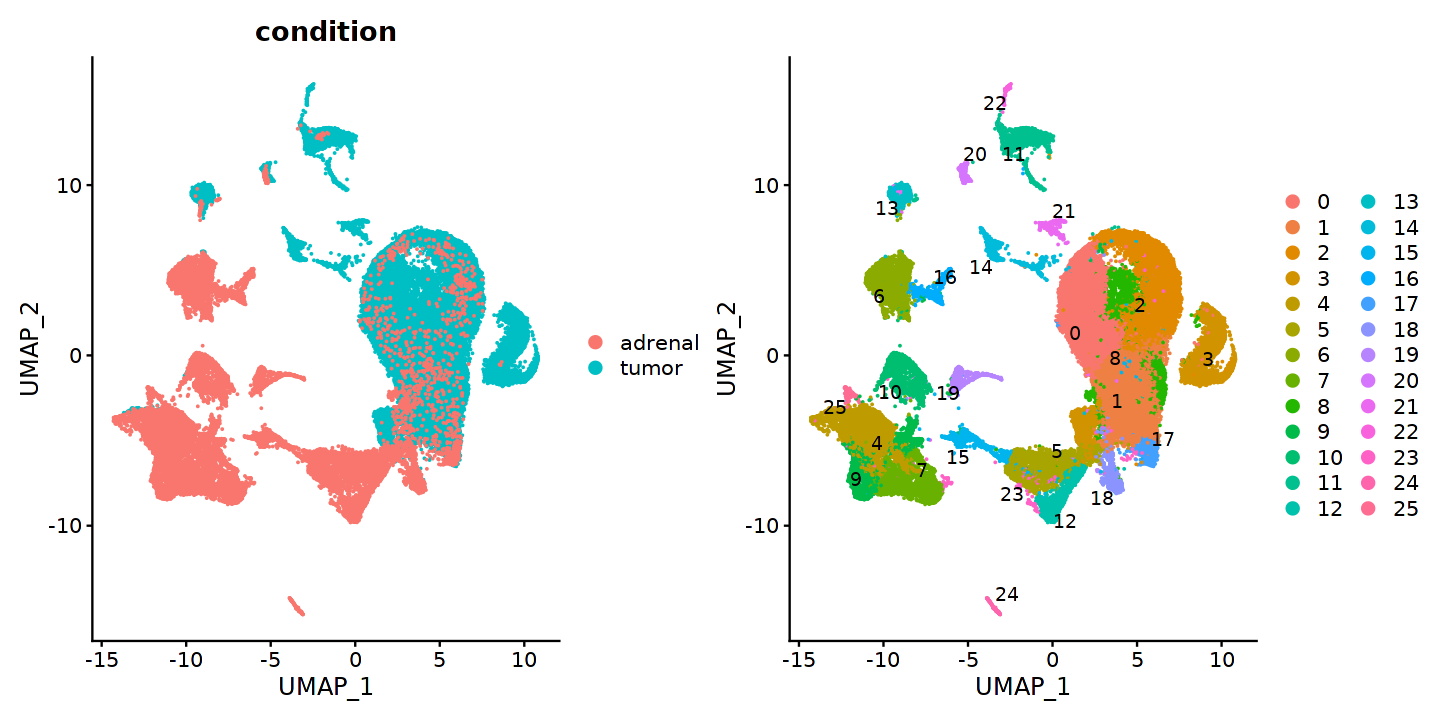

In [76]:
options(repr.plot.height=6, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(immune.combined, reduction = "umap", group.by = "condition")
p2 <- DimPlot(immune.combined, reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [77]:
annotations = openxlsx::read.xlsx(
    glue::glue(
        '/home/hsarkar/Projects/ThMYCN/Sheets/',
        'combined_diff_up_reg_v2 - Annotations.xlsx'
    ))
annotations = annotations$Annotation

In [78]:
conos.8 = readRDS(
    '/home/hsarkar/Projects/ThMYCN/combined_conos_app_v2_conos.rds'
)
tmp = conos.8$clusters$leiden$groups 
conos.8$clusters$leiden$groups  = annotations[tmp]
names(conos.8$clusters$leiden$groups) = names(tmp)
conos.8$clusters$leiden$groups = as.factor(conos.8$clusters$leiden$groups)
annot.8 = conos.8$clusters$leiden$groups

names(annot.8) = sub('(^[^_]+_[^_]+)_(.*)$', '\\2', names(annot.8))

In [79]:
immune.combined$clusters = annot.8

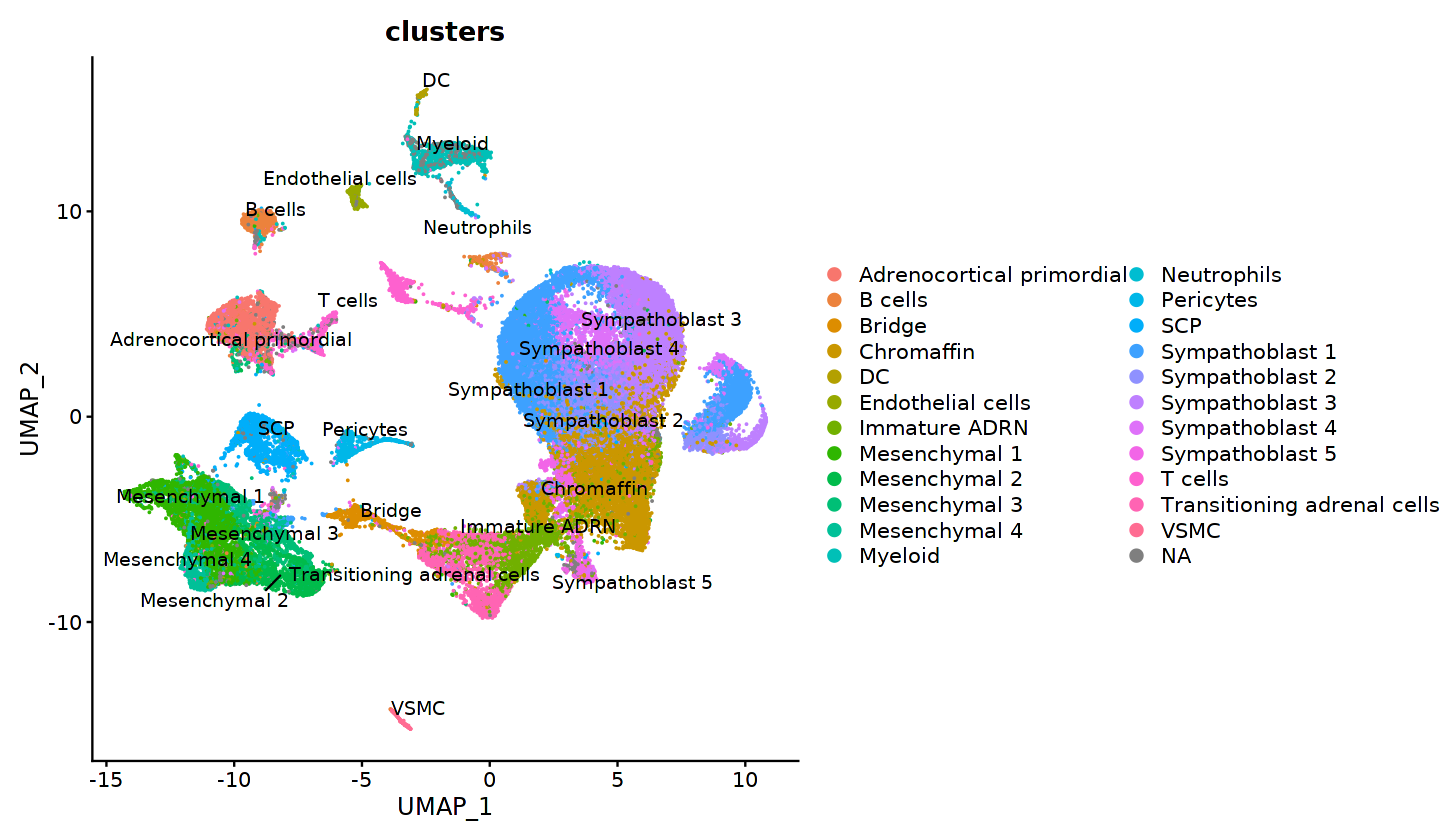

In [80]:
options(repr.plot.height=7, repr.plot.width=12, res=150 ) 
DimPlot(immune.combined, 
        reduction = "umap", 
        group.by = "clusters",
        label = TRUE, 
        repel = TRUE
       )

In [81]:
saveRDS(
    immune.combined, 
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/',
        'results/seurat/mouse_nb_adrenal_8_samples_seurat_cc_regressed.rds'
    )
)

### Subsample proportionally 

In [124]:
immune.combined.downsampled.cells = merge(
    immune.combined$clusters %>% data.frame %>%
    tibble::rownames_to_column(var='cell') %>%
    magrittr::set_colnames(c('cell','cell_type')),
    
    immune.combined$clusters %>% data.frame %>%
    tibble::rownames_to_column(var='cell') %>%
    magrittr::set_colnames(c('cell','cell_type')) %>% 
    count(cell_type) ,
    by = 'cell_type'
    ) %>% sample_n(10000, weight = n) %>%
    pull(cell)

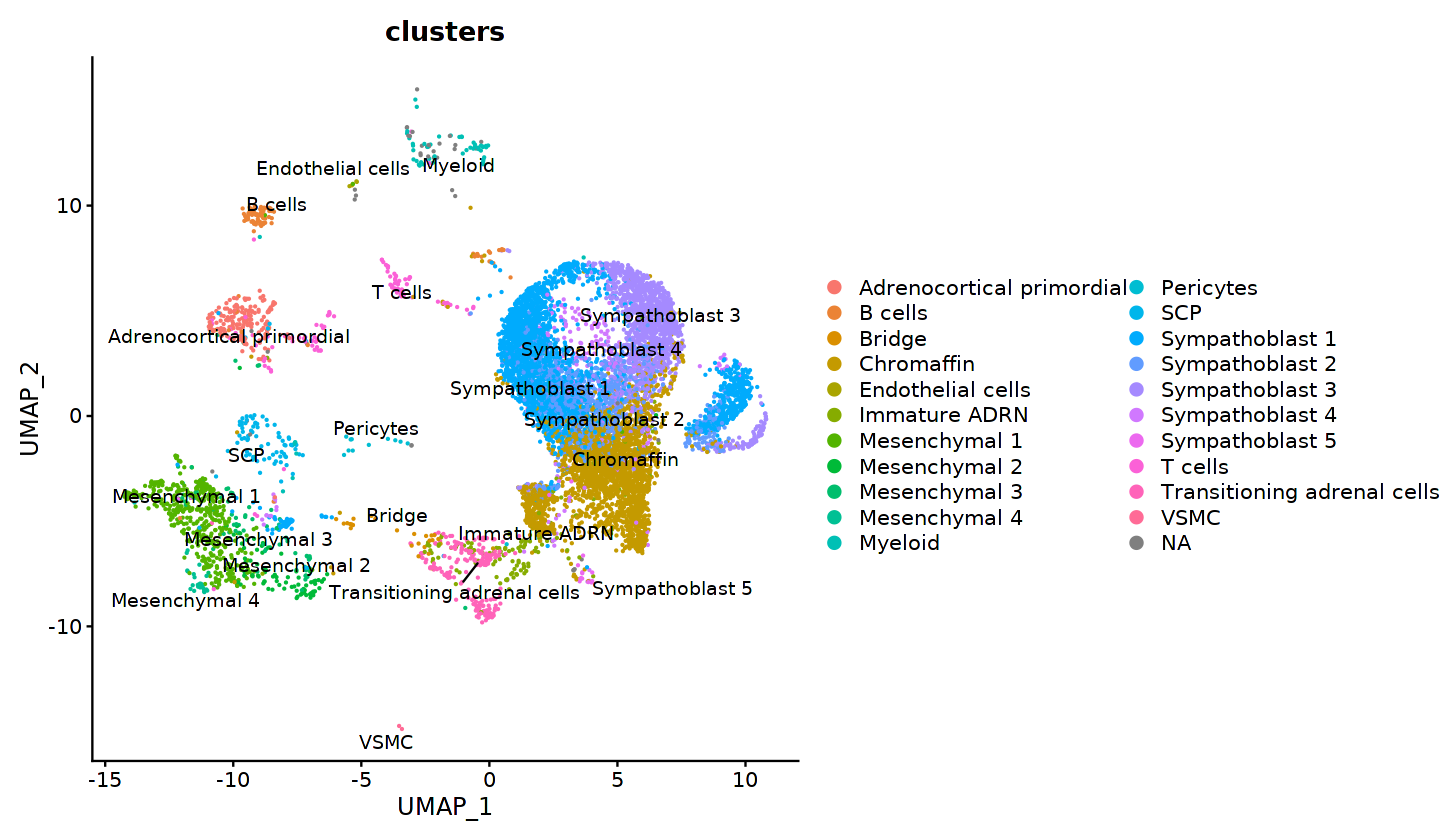

In [125]:
options(repr.plot.height=7, repr.plot.width=12, res=150 ) 
DimPlot(immune.combined, 
        cells = immune.combined.downsampled.cells,
        reduction = "umap", 
        group.by = "clusters",
        label = TRUE, 
        repel = TRUE
       )

In [126]:
immune.combined.downsampled = immune.combined[,immune.combined.downsampled.cells]

In [128]:
immune.combined.downsampled.p2 = covert_seurat_to_pagoda_app(
    immune.combined.downsampled,
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/results',
        '/seurat/Neuroblastoma_Adrenal_Mouse_8_Samples_10K_cells.bin'
    ),
    app.title='Neuroblastoma_Adrenal_Mouse_8_Samples_10K',
    n.cores=20
)

10000 cells, 21457 genes; normalizing ... 

Using plain model 

Winsorizing ... 

log scale ... 

done.


calculating variance fit ...

 using gam 

1406 overdispersed genes ... 1406

persisting ... 

done.

running PCA using 3000 OD genes .

.

.

.

 done




creating space of type angular done
adding data ... done
building index ... done
querying ... done


Estimating embeddings.


running tSNE using 20 cores:




creating space of type angular done
adding data ... done
building index ... done
querying ... done


Using multilevel clustering for PCA space




## 10K subsampled pagoda app [here](http://pklab.med.harvard.edu/nikolas/pagoda2/frontend/current/pagodaURL/index.html?fileURL=http://pklab.med.harvard.edu/hirak/public_html/ThMYCN/Neuroblastoma_Adrenal_Mouse_8_Samples_10K_cells.bin)

In [82]:
library(pagoda2)
library(igraph)


Attaching package: ‘pagoda2’


The following objects are masked from ‘package:conos’:

    buildWijMatrix, projectKNNs, sgdBatches




In [83]:
tumor_adrenal_8_p2 = basicP2proc(
    immune.combined@assays$RNA@counts, 
    n.cores = 10
)

61875 cells, 21457 genes; normalizing ... 

Using plain model 

Winsorizing ... 

log scale ... 

done.


calculating variance fit ...

 using gam 

3462 overdispersed genes ... 3462

persisting ... 

done.

running PCA using 3000 OD genes .

.

.

.

 done




creating space of type angular done
adding data ... done
building index ... done
querying ... done


Estimating embeddings.


Warning message in p2$getEmbedding(type = "PCA", embeddingType = "tSNE", perplexity = perplexity, :
“Too many cells to pre-calculate correlation distances, switching to L2. Please consider using UMAP.”
running tSNE using 10 cores:




creating space of type angular done
adding data ... done
building index ... done
querying ... done


In [84]:
go.env <- p2.generate.human.go(tumor_adrenal_8_p2)

In [85]:
tumor_adrenal_8_p2$clusters$PCA$seurat_cluster = as.factor(
    immune.combined@meta.data$seurat_cluster
)
names(tumor_adrenal_8_p2$clusters$PCA$seurat_cluster) = rownames(immune.combined@meta.data)

tumor_adrenal_8_p2$embeddings$PCA$tSNE = as.matrix(
    immune.combined@reductions$umap@cell.embeddings)
    #p2$embeddings$PCA = as.matrix(p2$embeddings$PCA@cell.embeddings)

tumor_adrenal_8_p2$clusters$PCA$timepoint = as.factor(immune.combined@meta.data$orig.ident)
names(tumor_adrenal_8_p2$clusters$PCA$timepoint) = rownames(immune.combined@meta.data)

tumor_adrenal_8_p2$embeddings$PCA$tSNE = as.matrix(
    immune.combined@reductions$umap@cell.embeddings
)

In [86]:
cat('Calculating hdea...\n')
hdea <- tumor_adrenal_8_p2$getHierarchicalDiffExpressionAspects(
    type='PCA',
    clusterName='multilevel',
    z.threshold=3, 
    n.cores = 30
)

Calculating hdea...


Using multilevel clustering for PCA space




In [88]:
extraWebMetadata = NULL
    
metadata.forweb <- list();
metadata.forweb$timepoint <- p2.metadata.from.factor(
    tumor_adrenal_8_p2$clusters$PCA$timepoint,
    displayname='timepoint'
)
metadata.forweb$leiden <- p2.metadata.from.factor(
    tumor_adrenal_8_p2$clusters$PCA$seurat_cluster,
    displayname='seurat_cluster'
)
metadata.forweb$multilevel <- p2.metadata.from.factor(
    tumor_adrenal_8_p2$clusters$PCA$multilevel,
    displayname='multilevel'
)
metadata.forweb <- c(metadata.forweb, extraWebMetadata)
genesets <- hierDiffToGenesets(hdea)
appmetadata = list(apptitle='Neuroblastoma_Adrenal_Mouse_8_Samples')

In [89]:
cat('Making KNN graph...\n')
    #p2$makeGeneKnnGraph(n.cores=n.cores)
p2w = make.p2.app(
    tumor_adrenal_8_p2, 
    additionalMetadata = metadata.forweb, 
    geneSets = genesets, 
    dendrogramCellGroups = tumor_adrenal_8_p2$clusters$PCA$multilevel, 
    show.clusters=F, 
    appmetadata = appmetadata
)

Making KNN graph...


In [90]:
p2w$serializeToStaticFast(binary.filename = glue::glue(
    '/home/hsarkar/Projects/neuroblastoma_analysis/',
    'results/seurat/Neuroblastoma_Adrenal_Mouse_8_Samples.bin'
))

NULL

# Please find the app with 8 samples [here](http://pklab.med.harvard.edu/nikolas/pagoda2/frontend/current/pagodaURL/index.html?fileURL=http://pklab.med.harvard.edu/hirak/public_html/ThMYCN/Neuroblastoma_Adrenal_Mouse_8_Samples.bin)

In [91]:
saveRDS(
    tumor_adrenal_8_p2,
    glue::glue(
        '/home/hsarkar/Projects/neuroblastoma_analysis/',
        'results/seurat/Neuroblastoma_Adrenal_Mouse_8_Samples_seurat_pagoda.rds'
    ))